In [2]:
# Import Libraries and modules
#!pip3 install lightgbm
# libraries that are used for analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.max_columns', 500)
plt.style.use('ggplot')

# to import datetime library
from datetime import datetime
import datetime as dt

# libraries used to pre-process
from sklearn import preprocessing, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


# libraries used to implement models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMRegressor


# libraries to evaluate performance
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error

# Library of warnings would assist in ignoring warnings issued
import warnings
warnings.filterwarnings('ignore')

# to set max column display
pd.pandas.set_option('display.max_columns',None)

c:\Users\wintel\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


# Introduction
Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

# 1. About Dataset

The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.
1. Date - The specific calendar date for the bike rental record (Day-Month-Year)
2. Rented Bike count - The number of bikes rented during a specific time interval (Target Variable)
3. Hour - Hour of the day
4. Temperature - The temperature in Celsius at the time of the bike rental
5. Humidity - The relative humidity percentage at the time of the bike rental (%)
6. Windspeed - The speed of the wind in meters per second at the time of the bike rental (m/s)
7. Visibility - The visibility in meters at the time of the bike rental (10m)
8. Dew point temperature - The temperature at which air becomes saturated and dew forms at the time of the bike rental (Celsius)
9. Solar radiation - The amount of solar radiation in mega-joules per square meter at the time of the bike rental (MJ/m2)
10. Rainfall - The amount of rainfall in millimeters at the time of the bike rental (mm)
11. Snowfall - The amount of snowfall in centimeters at the time of the bike rental (cm)
12. Seasons - Winter, Spring, Summer, Autumn
13. Holiday - A categorical variable indicating whether the day of the bike rental record is a holiday or not. It has two possible values: "Holiday" and "No Holiday". The "Holiday" value represents a day that is recognized as a holiday, while the "No Holiday" value represents a regular day that is not a designated holiday.
14. Functional Day - A categorical variable indicating whether the bike rental service was functioning on the day of the record. It has two possible values: "Yes" and "No". The "Yes" value indicates that the bike rental service was operational and functioning normally on that day. Conversely, the "No" value indicates that the bike rental service was not operating, potentially due to maintenance, strikes, or other reasons.

### 1.1 Dataset Loading

In [3]:
url = 'https://raw.githubusercontent.com/Nayaeun/Bike-Sharing-Prediction/main/Data/SeoulBikeData.csv'
df = pd.read_csv(url, encoding= 'unicode_escape')

### 1.2 Dataset Check

In [4]:
df.info()
df.head(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
print (df.shape)
df.nunique()

(8760, 14)


Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

#### Observation:
* The dataset contains 8760 rows and 14 columns.
* There are 6 columns of datatype float64, 4 columns of datatype int64 and 4 columns of datatype object.
* There are no missing and duplicate values in the dataset.
* The dataset contains bike rental data of 1 year.
* Input features: Date, Hour, Temp, Humid, WindSpeed, Visibility, DewPTemp, SolarRad, Rainfall, Snowfall, Season, Holiday, Functioning
* Target feature: **Rented Bike Count**

# 2. About Features

In [6]:
# Statistical summary of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [7]:
# Check Unique Values for each variable
for i in df.columns.to_list():
  print('Number of unique values in', i, 'is', df[i].nunique())

Number of unique values in Date is 365
Number of unique values in Rented Bike Count is 2166
Number of unique values in Hour is 24
Number of unique values in Temperature(°C) is 546
Number of unique values in Humidity(%) is 90
Number of unique values in Wind speed (m/s) is 65
Number of unique values in Visibility (10m) is 1789
Number of unique values in Dew point temperature(°C) is 556
Number of unique values in Solar Radiation (MJ/m2) is 345
Number of unique values in Rainfall(mm) is 61
Number of unique values in Snowfall (cm) is 51
Number of unique values in Seasons is 4
Number of unique values in Holiday is 2
Number of unique values in Functioning Day is 2


In [8]:
# Converting Date column of datatype Object to Datetime datatype
df['Date'] = pd.to_datetime(df['Date'], dayfirst = True)
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [9]:
# Extracting day name feature
df['Day'] = df['Date'].dt.day_name()

# Extracting month name feature
df['Month'] = df['Date'].dt.month_name()

# Extracting year feature
df['Year'] = df['Date'].dt.year

# Dropping Date column
df.drop(columns = ['Date'], inplace = True)
df.head(1)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,2017


In [10]:
# Rename the complex columns name
df = df.rename (columns = {'Rented Bike Count':'BikeCount', 
                           'Temperature(°C)':'Temp',
                           'Humidity(%)':'Humid',
                           'Wind speed (m/s)':'WindSpeed',
                           'Visibility (10m)':'Visibility', 
                           'Dew point temperature(°C)':'DewPTemp',
                           'Solar Radiation (MJ/m2)':'SolarRad',
                           'Rainfall(mm)':'Rainfall',
                           'Snowfall (cm)':'Snowfall',
                           'Functioning Day':'Functioning'})
df.head(1)

,BikeCount,Hour,Temp,Humid,WindSpeed,Visibility,DewPTemp,SolarRad,Rainfall,Snowfall,Seasons,Holiday,Functioning,Day,Month,Year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,2017


In [11]:
# convert Hour and Year columns from integer to object
df['Hour'] = df['Hour'].astype('object')
df['Year'] = df['Year'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   BikeCount    8760 non-null   int64  
 1   Hour         8760 non-null   object 
 2   Temp         8760 non-null   float64
 3   Humid        8760 non-null   int64  
 4   WindSpeed    8760 non-null   float64
 5   Visibility   8760 non-null   int64  
 6   DewPTemp     8760 non-null   float64
 7   SolarRad     8760 non-null   float64
 8   Rainfall     8760 non-null   float64
 9   Snowfall     8760 non-null   float64
 10  Seasons      8760 non-null   object 
 11  Holiday      8760 non-null   object 
 12  Functioning  8760 non-null   object 
 13  Day          8760 non-null   object 
 14  Month        8760 non-null   object 
 15  Year         8760 non-null   object 
dtypes: float64(6), int64(3), object(7)
memory usage: 1.1+ MB


# 3. Exploratory Data Analysis
It is a crucial step in the data analysis process that involves exploring and understanding the characteristics, patterns, and relationships within a dataset. EDA aims to uncover insights, identify patterns, detect outliers, and gain a deeper understanding of the data before conducting further analysis or modeling.

### 3.1 Dividing data into numerical and categorical features

In [12]:
# Dividing data into numerical and categorical features
categorical_features = df.select_dtypes(include = 'object')
numerical_features = df.select_dtypes(exclude = 'object')

In [13]:
categorical_features.head(5)

,Hour,Seasons,Holiday,Functioning,Day,Month,Year
0,0,Winter,No Holiday,Yes,Friday,December,2017
1,1,Winter,No Holiday,Yes,Friday,December,2017
2,2,Winter,No Holiday,Yes,Friday,December,2017
3,3,Winter,No Holiday,Yes,Friday,December,2017
4,4,Winter,No Holiday,Yes,Friday,December,2017


In [14]:
numerical_features.head(5)

,BikeCount,Temp,Humid,WindSpeed,Visibility,DewPTemp,SolarRad,Rainfall,Snowfall
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0


### 3.2 Univariate Analysis

#### 3.2.1 Data Distribusion of Numerical features

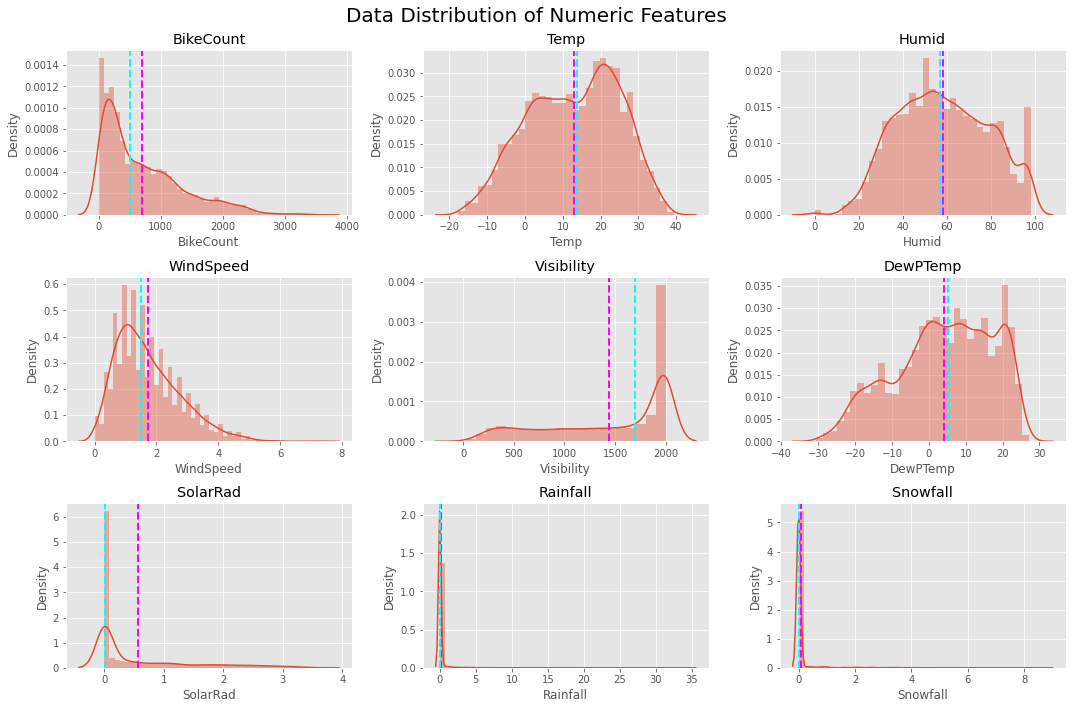

In [15]:
# figsize
plt.figure(figsize=(15,10))

# title
plt.suptitle('Data Distribution of Numeric Features', fontsize = 20)

for i, col in enumerate(numerical_features):
  # subplots 3 rows and 3 columns
  plt.subplot(3, 3, i+1 )

  # dist plot
  sns.distplot(df[col])
  plt.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)

  plt.title(col)
  plt.tight_layout()

**Obervations:**

For numerical features, we can see that the majority of distributions are right-skewed and few are left-skewed.
* Right-skewed columns: Rented Bike Count, Wind Speed, Solar Radiation, Rainfall, Snowfall.
* Left-skewed columns: Visibility and Dew point temperature

#### 3.2.2 Outliers of Numerical Features

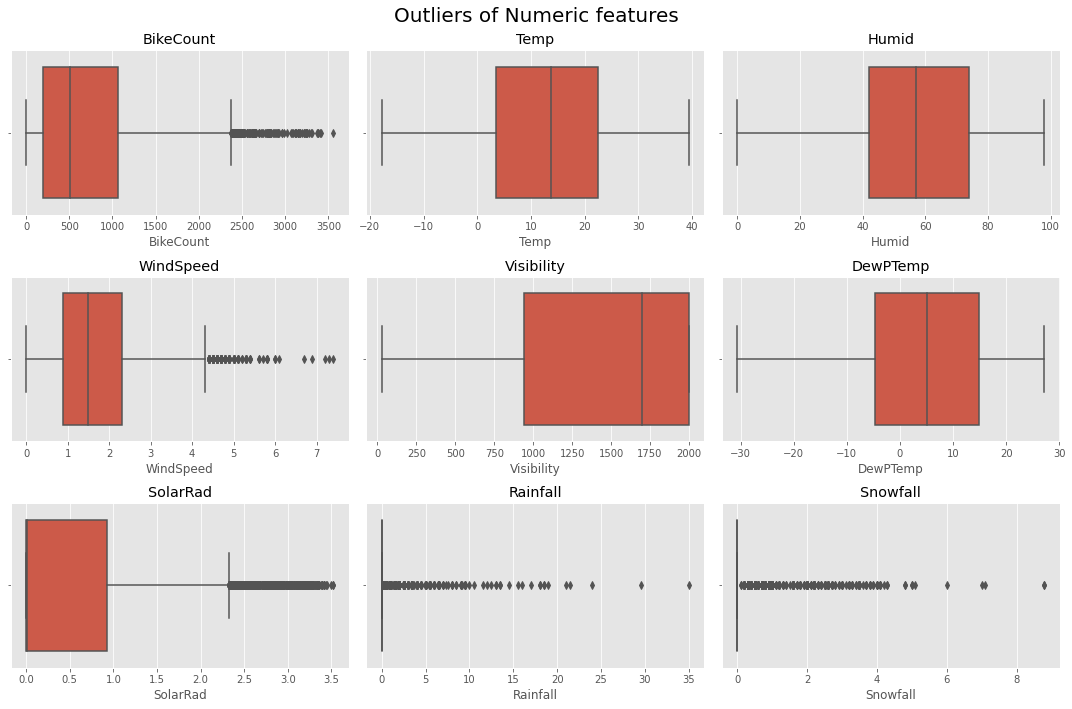

In [16]:
# figsize
plt.figure(figsize = (15,10))

# title
plt.suptitle('Outliers of Numeric features', fontsize = 20)

for i, col in enumerate(numerical_features):
  # subplots 3 rows, 3 columns
  plt.subplot(3,3, i+1)

  # boxplots
  sns.boxplot(numerical_features[col])

  plt.title(col)
  plt.tight_layout()

**Observations:**

Outliers are visible in most of the numerical columns.
* These columns are Rented Bike Count, Wind Speed, Solar Radiation, Rainfall & Snowfall.
* The columns like Temperature, Humidity, Visibility & Dew point temperature do not contain any outliers.

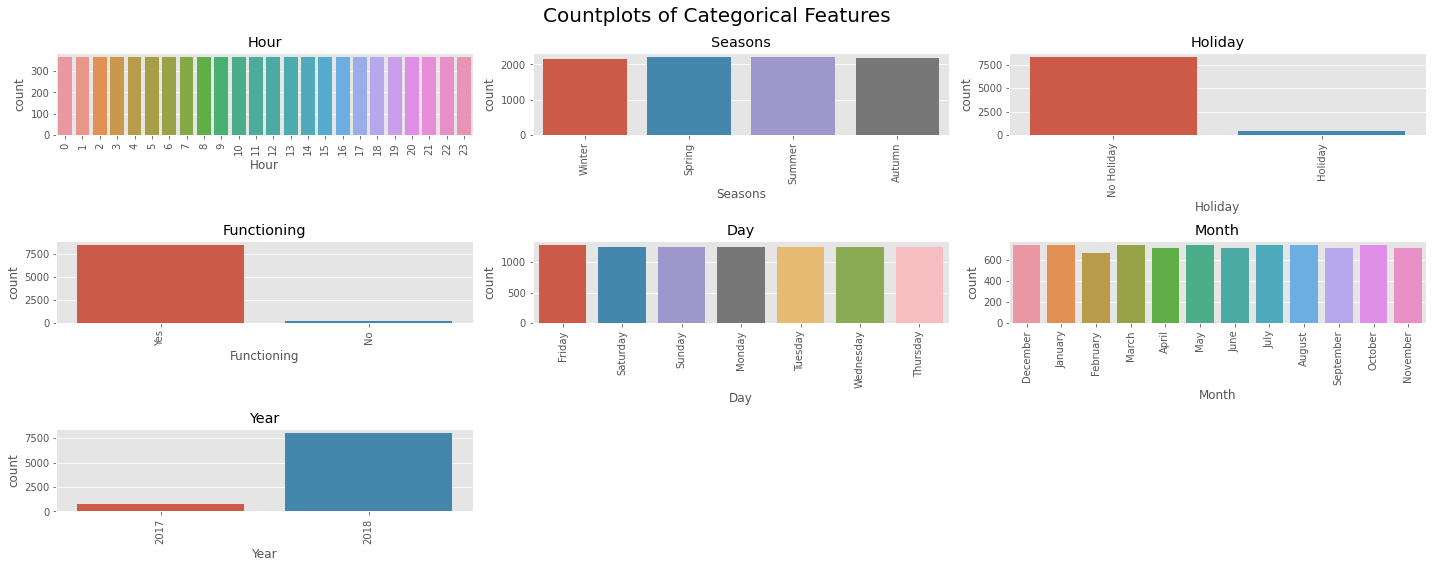

In [17]:
# figure
plt.figure(figsize = (20,8))

# title
plt.suptitle('Countplots of Categorical Features', fontsize = 20)

for i, col in enumerate(categorical_features):
  # subplots of
  plt.subplot(3,3, i+1)

  # Countplots
  sns.countplot(x = categorical_features[col])

  plt.xticks(rotation ='vertical')
  plt.title(col)
  plt.tight_layout()


**Observations:**

* Every hour has an equal number of counts in the dataset.
* Every season has almost equal number of counts.
* Dataset has more records of No holiday than a holiday which is obvious as most of the days are working days.
* Dataset has more records of Functioning Day than no functioning day which is obvious as most of the days are working days.
* Except Friday, other Days have equal number of counts in the dataset.
* Months like April, June, September, November & February have a slightly low number of count comparted to other months.
* More data was colected in the year 2018 than 2017.

### 3.3 Bivariate Analysis

#### 3.3.1 Target variable and numerical features

<Figure size 432x288 with 0 Axes>

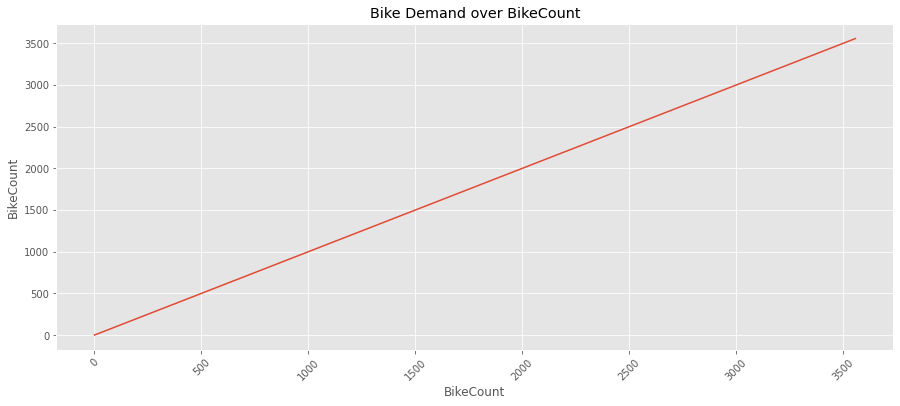

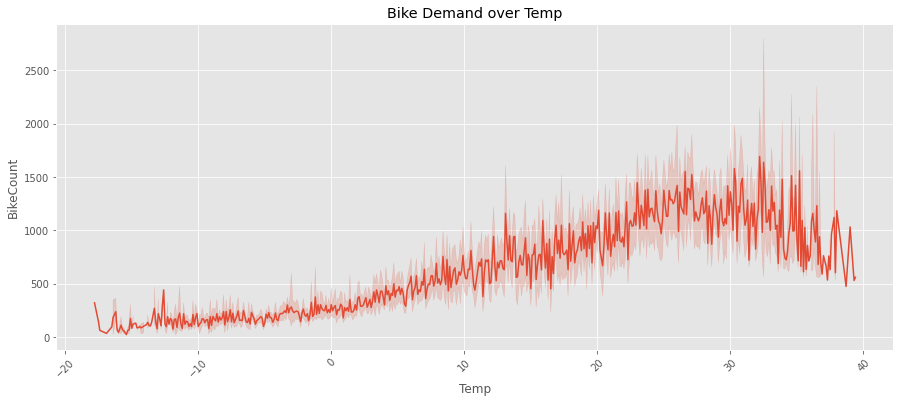

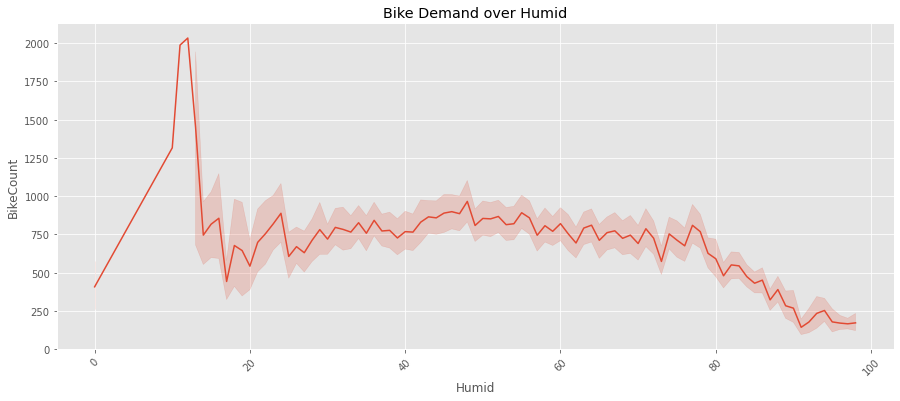

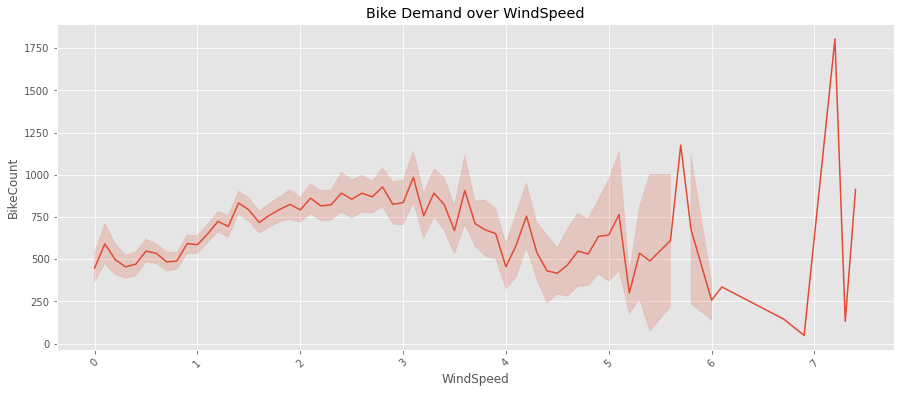

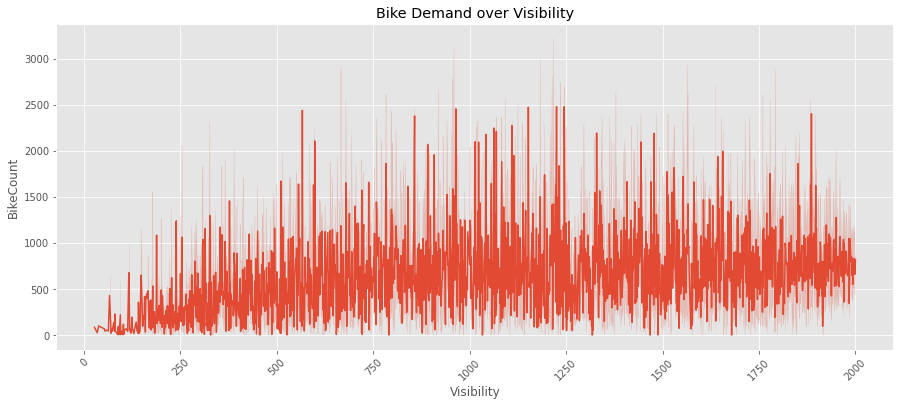

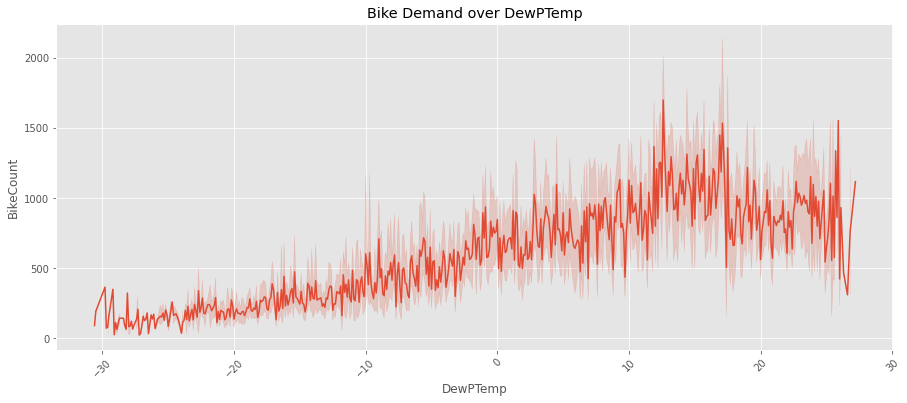

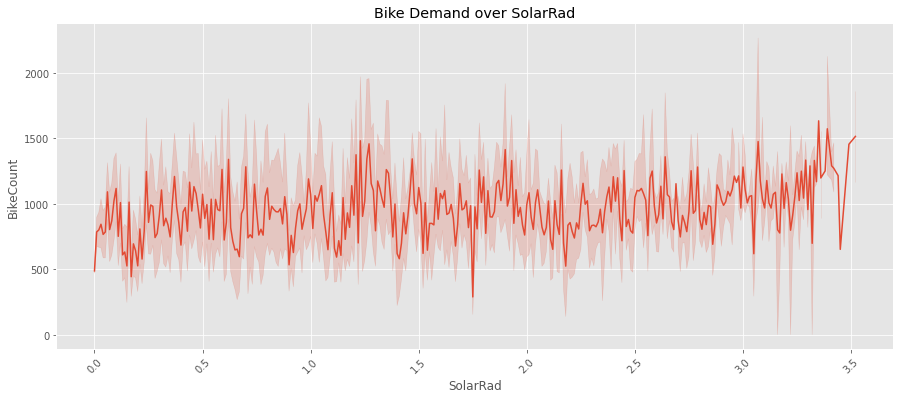

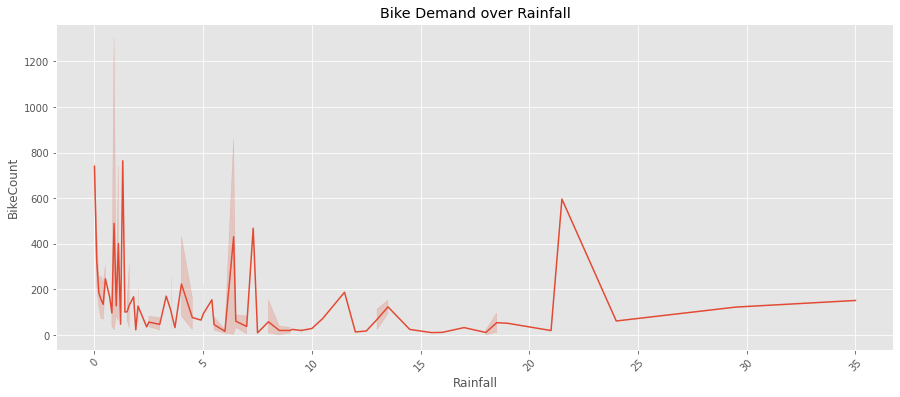

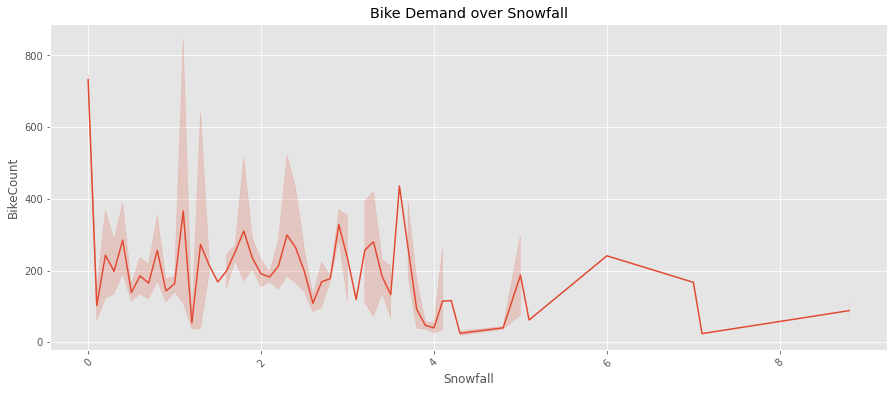

In [18]:
# Identify patterns and trends in numerical features

plt.suptitle('Bivariate Analysis of Numerical features', fontsize=20)

for i in numerical_features:
  plt.figure(figsize=(15,6))
  sns.lineplot(x= i, y='BikeCount', data = numerical_features, palette='Grouped')
  plt.title(f"Bike Demand over {i}");
  print('\n')
  plt.xticks(rotation = 45)
  plt.show()

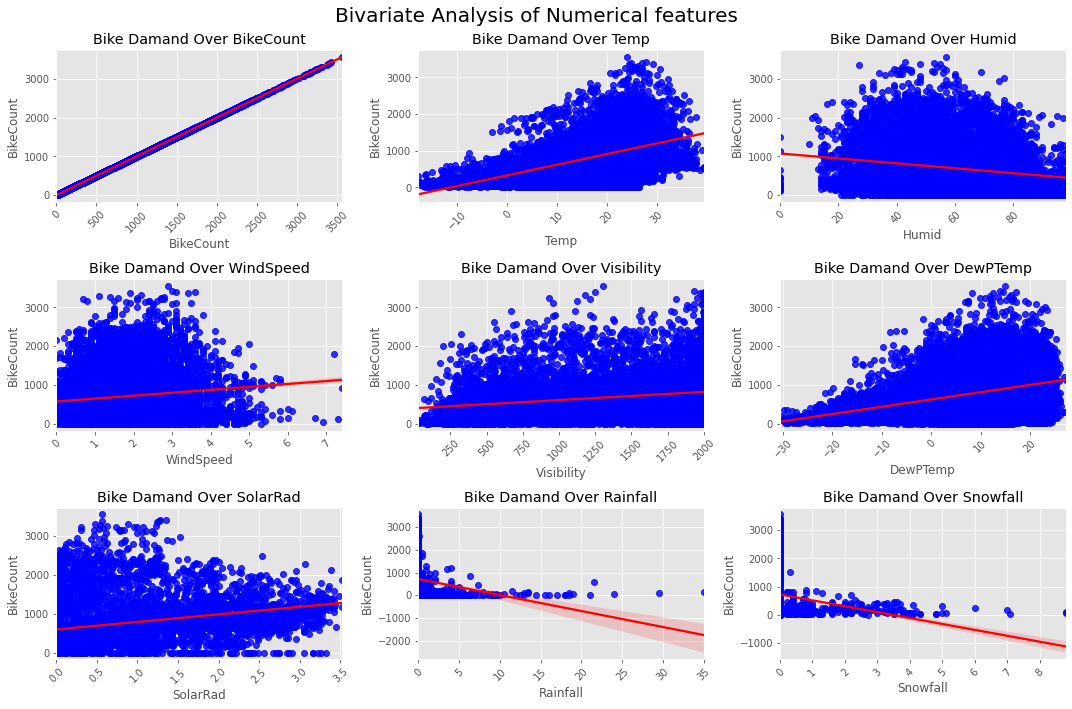

In [19]:
plt.figure(figsize = (15, 10))

# title
plt.suptitle('Bivariate Analysis of Numerical features', fontsize=20)

for index, col in enumerate(numerical_features):

  # subplots of 3 rows and 3 columns
  plt.subplot(3,3, index+1)

  # line plot
  sns.regplot(x = numerical_features[col], y = numerical_features['BikeCount'], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

  plt.title(f'Bike Damand Over {col}')
  plt.xticks(rotation = 45)
  plt.tight_layout()

**Observations:**

The above scatter plots for the numerical features indicate that the columns Temperature, Wind_speed, Visibility, Dew_point_temperature & Solar_Radiation are positively correlated with the target variable, ie , with an increase in these features results in an increase in rented bike count.

On the other hand, Rainfall, Snowfall & Humidity are negatively correlated with the target variable, indicating that with an increase in these features results in a decrease in rented bike count.

#### 3.3.2 Target variable and categorical features

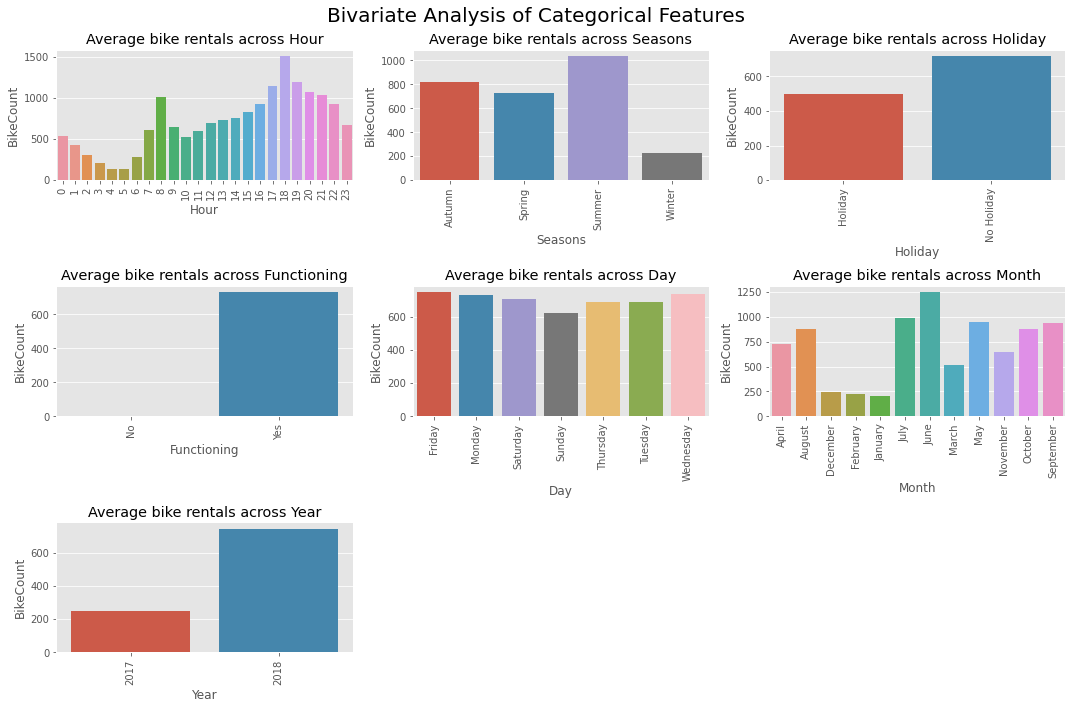

In [20]:
# Counting number of category present in each feature with respect to target feature

# figsize
plt.figure(figsize=(15,10))
# title
plt.suptitle('Bivariate Analysis of Categorical Features', fontsize=20)

for i,col in enumerate(categorical_features):
   # subplots of 3 rows and 3 columns
  plt.subplot(3, 3, i+1)
  a = df.groupby(col)[['BikeCount']].mean().reset_index()

  # barplot
  sns.barplot(x=a[col], y=a['BikeCount'])
  # x-axis label
  plt.title(f'Average bike rentals across {col}')
  plt.xticks(rotation = 'vertical')
  plt.tight_layout()

**Observations:**

* **Hours**: The highest demand is in hours from 7 to 10 and from 15 to 19. This could be the reason that in most of the metroploitan cities this is the peak office time and so more people would be renting bikes.import itertools
* **Seasons**: Summer season had the higest Bike Rent Count. People are more likely to rent bikes in summer. Bike rentals in winter is very less compared to other seasons.
* **Holidays**: High number of bikes were rented on No Holidays.
* **Functioning Day**: On 'No Functioning Day, only 295 bikes were rented. Hence, this column does not add value to our prediction, we can drop this column in the next steps.
* **Day**: Most of the bikes were rented on Weekdays compared to weekends.
* **Month**: From March Bike Rent Count started increasing and it was highest in June.

### 3.4 Multivariate Analysis

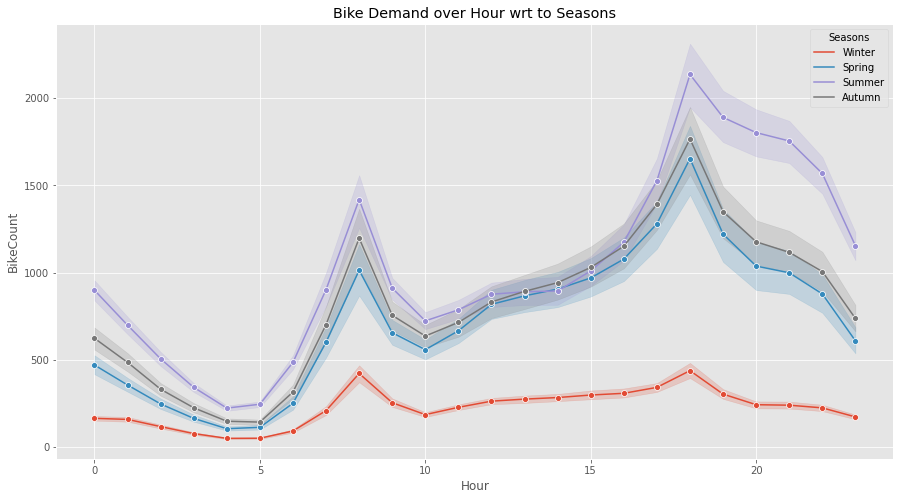

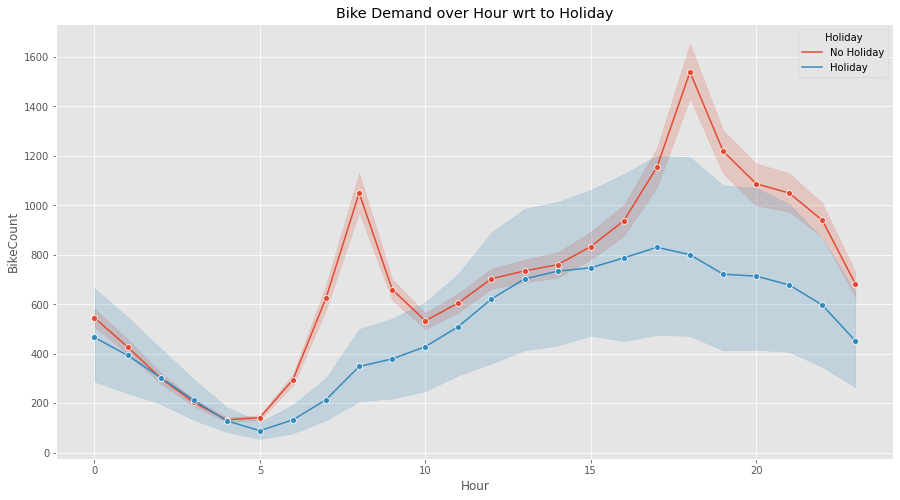

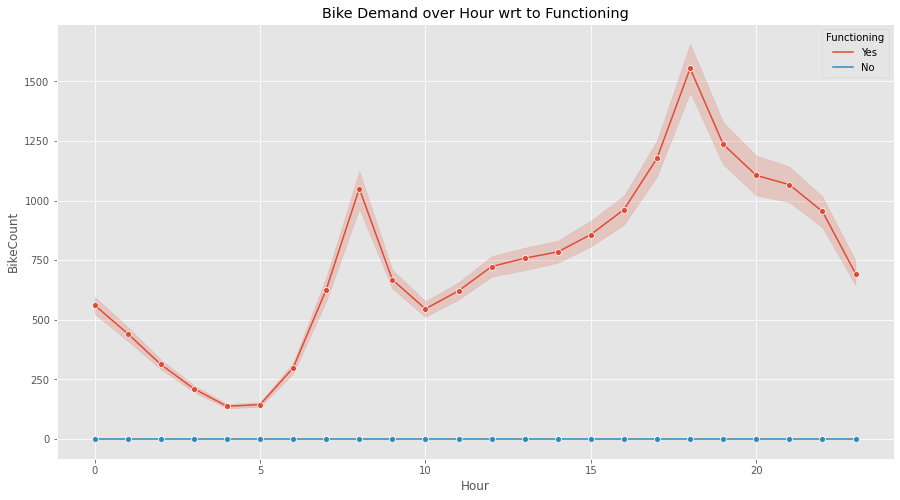

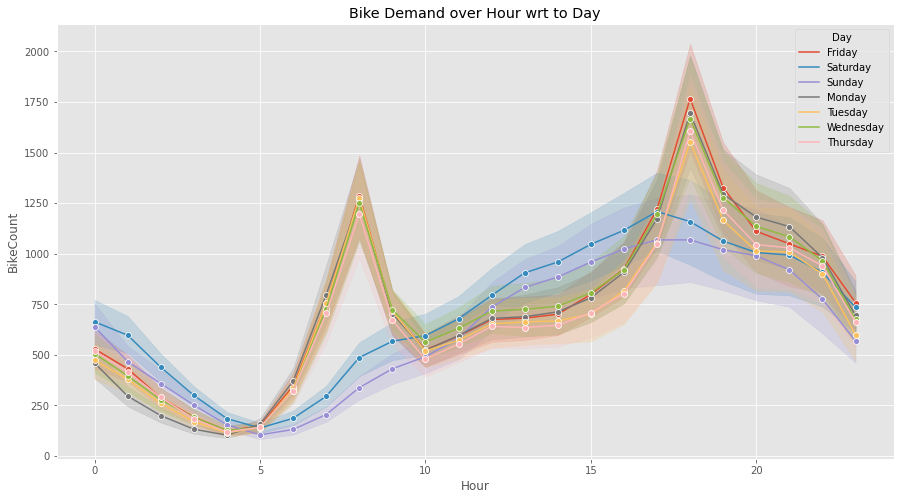

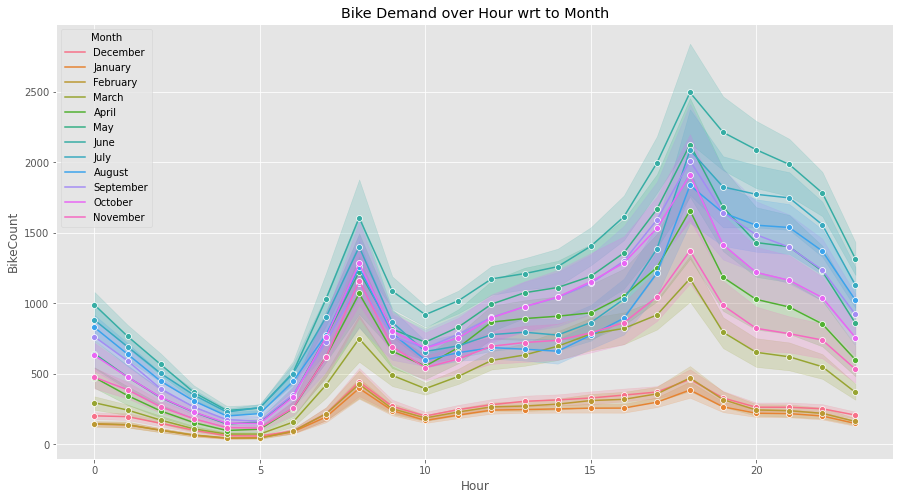

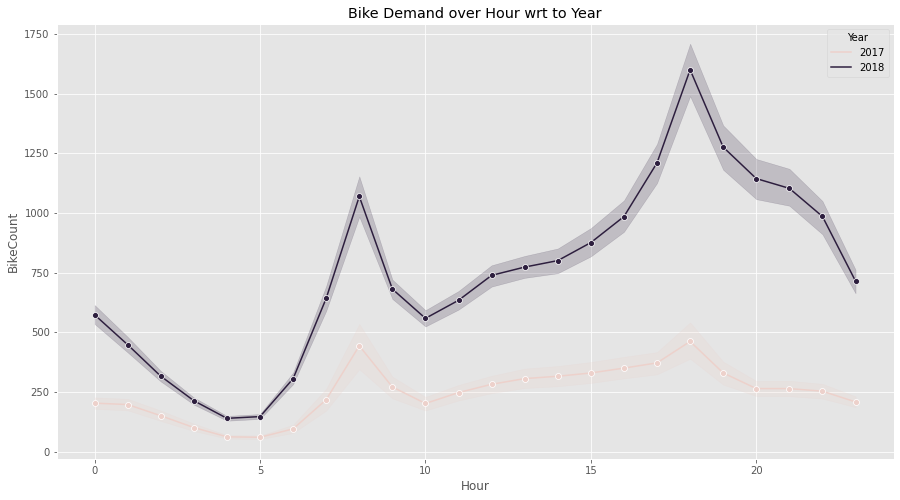

In [21]:
# Analysing bike demand with respect to hour and different third value
for i in categorical_features:
  if i == 'Hour':
    pass
  else:
    plt.figure(figsize=(15,8))
    sns.lineplot(x= df["Hour"], y= df['BikeCount'], hue= df[i], marker ='o')
    plt.title(f"Bike Demand over Hour wrt to {i}")
  plt.show()

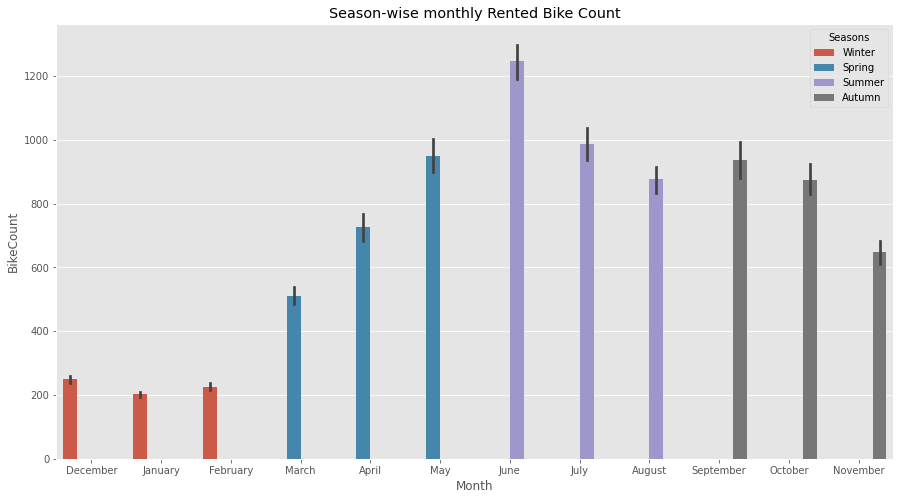

In [22]:
#Bar plot for seasonwise monthly distribution of Rented_Bike_Count
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(x='Month',y='BikeCount',data= df, hue='Seasons',ax=ax);
ax.set_title('Season-wise monthly Rented Bike Count')
plt.show()

**Observations:**

The above regression plots for the numerical features indicate that the columns Temperature, Wind_speed, Visibility, Dew_point_temperature & Solar_Radiation are positively correlated with the target variable, ie , with an increase in these features results in an increase in rented bike count.

On the other hand, Rainfall, Snowfall & Humidity are negatively correlated with the target variable, indicating that with an increase in these features results in a decrease in rented bike count.

# 4. Data Cleaning
Data cleaning, also known as data cleansing or data scrubbing, refers to the process of identifying and correcting or removing errors, inconsistencies, and inaccuracies in a dataset. It involves handling missing data, removing duplicates, addressing outliers, standardizing formats, resolving inconsistencies, and validating data. Data cleaning ensures that the data is accurate, complete, and reliable for analysis or machine learning purposes.

### 4.1 Handling missing & duplicate values

In [23]:
# Dataset Duplicate Value Count
print('The number of duplicated values in each column:' , df.duplicated().sum())
print ('Missing values:\n', df.isnull().sum())

The number of duplicated values in each column: 0
Missing values:
 BikeCount      0
Hour           0
Temp           0
Humid          0
WindSpeed      0
Visibility     0
DewPTemp       0
SolarRad       0
Rainfall       0
Snowfall       0
Seasons        0
Holiday        0
Functioning    0
Day            0
Month          0
Year           0
dtype: int64


As we can see there are no missing & duplicate values, so we can move ahead.

### 4.2 Handling outliers

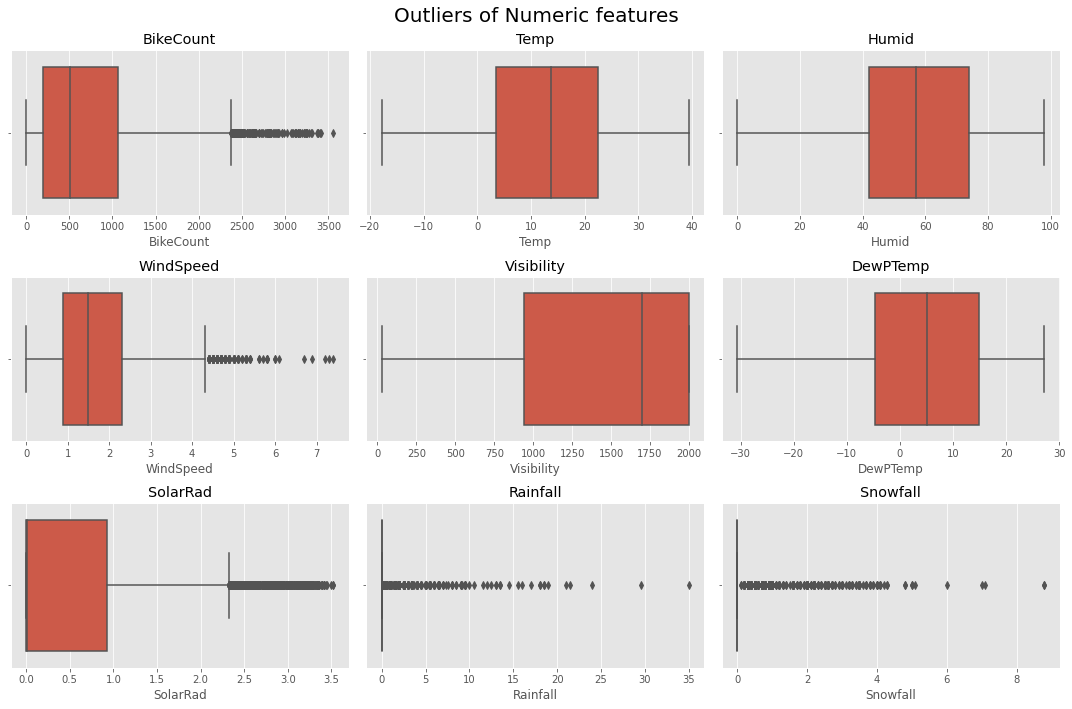

In [24]:
# figsize
plt.figure(figsize = (15,10))

# title
plt.suptitle('Outliers of Numeric features', fontsize = 20)

for i, col in enumerate(numerical_features):
  # subplots 3 rows, 3 columns
  plt.subplot(3,3, i+1)

  # boxplots
  sns.boxplot(numerical_features[col])

  plt.title(col)
  plt.tight_layout()

We could see that **BikeCount, WindSpeed, SolarRad, Rainfall, Snowfall** contains outliers. 

In [25]:
# Selecting variables that have data types float and int.
var = list(df.select_dtypes(include=['float64','int64']).columns)

In [26]:
#Creating a list of columns that contains outliers
def calculate_ranges(data, column):

  # Skip categorical columns
  if data[column].dtype == 'object':
    return None, None
  else:
    # Calculate quartiles
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)

    # Calculate IQR
    IQR = Q3 - Q1

    # Calculate upper and lower ranges
    upper_range = Q3 + 1.5 * IQR
    lower_range = Q1 - 1.5 * IQR

    return upper_range, lower_range

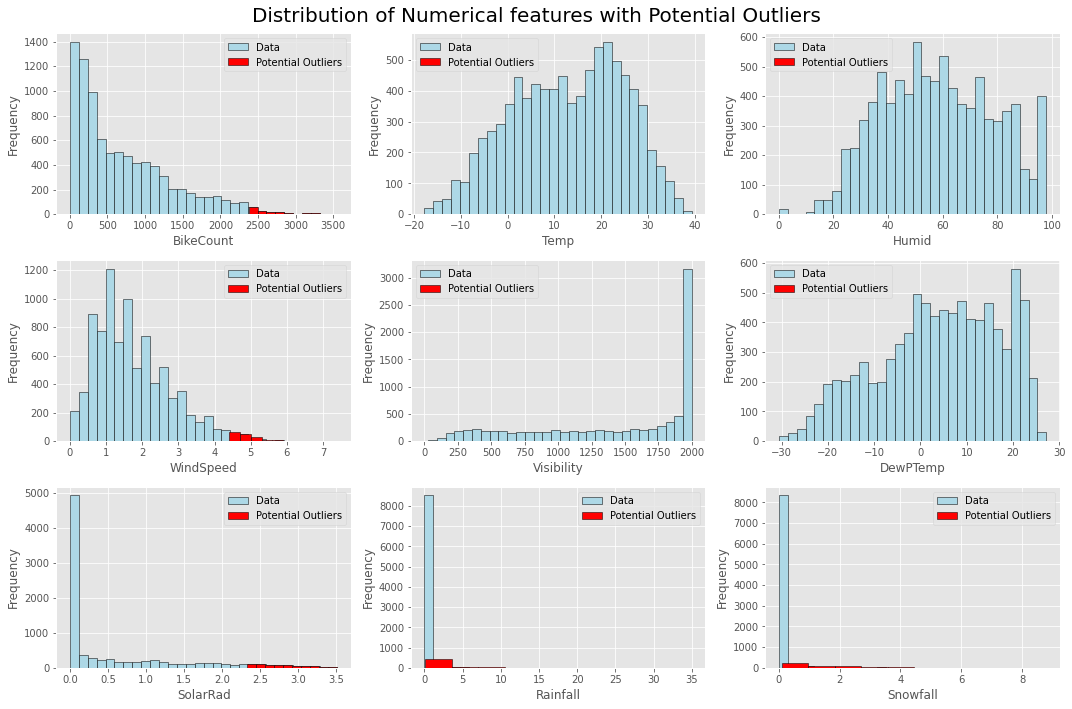

In [27]:
# Identify potential outliers
plt.figure(figsize = (15,10))

for index, col in enumerate(var):

  # Apply calculate_ranges function to get upper bound and lower bound
  upper_bound, lower_bound = calculate_ranges(df, col)

  # Identify potential outliers
  outliers = df[(df[col] > upper_bound) | (df[col] < lower_bound)]

# Visualize the potential outliers
  #plt.figure(figsize=(8, 6))

  # subplots 3 rows, 3 columns
  plt.subplot(3,3, index+1)
  plt.hist(df[col], bins=30, color='lightblue', edgecolor='black', label='Data')
  plt.hist(outliers[col], bins=10, color='red', edgecolor='black', label='Potential Outliers')
  plt.xlabel(col)
  plt.ylabel('Frequency')

  plt.suptitle('Distribution of Numerical features with Potential Outliers', fontsize = 20)
  plt.legend()
  plt.tight_layout()
  #plt.show()
     

It is not wise to trim the entire outliers as we tend to lose many data points. Hence we are not simply removing the outlier instead of that we are using *Yeo-Johnson transformation** since the feature values have zero and negative values.

In [28]:
from sklearn.preprocessing import PowerTransformer
sc_X = PowerTransformer(method = 'yeo-johnson')
df[var] = sc_X.fit_transform(df[var])

In [29]:
new_df = df.copy()

In [30]:
# # We do not want any transformation in our target variable as it is possible to have outlier in Seoul Environment
# # Removing rainfall and snowfall as it may remove important information as these 2 columns are highly skewed.

# num_features = ['Temp', 'Humid', 'WindSpeed', 'Visibility', 'DewPTemp', 'SolarRad']

# # We are going to replace the datapoints with upper and lower bound of all the outliers

# def clip_outliers(df):
#     #numerical_features = ['Temperature', 'Humidity', 'Wind Speed', 'Visibility', 'Dew point temperature', 'Solar Radiation']

#     for col in num_features:
#         # Using IQR method to define the range of upper and lower limits
#         q1 = df[col].quantile(0.25)
#         q3 = df[col].quantile(0.75)
#         iqr = q3 - q1
#         lower_bound = q1 - 1.5 * iqr
#         upper_bound = q3 + 1.5 * iqr

#         # Replacing the outliers with the upper and lower bounds
#         df[col] = df[col].clip(lower_bound, upper_bound)

#     return df

# new_df = clip_outliers(new_df)

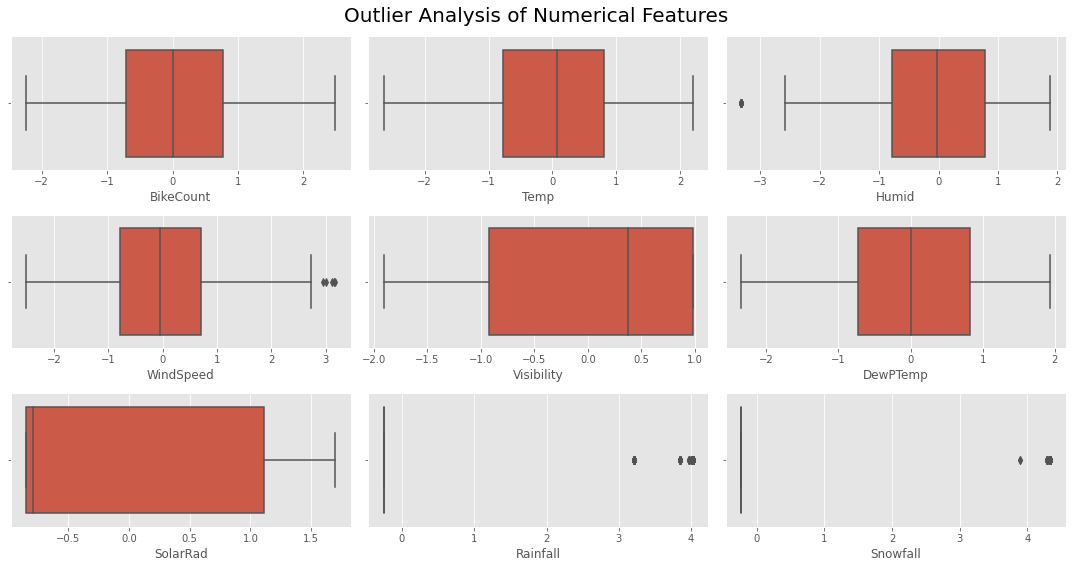

In [31]:
# checking the boxplot after outlier treatment

# figsize
plt.figure(figsize=(15,8))
# title
plt.suptitle('Outlier Analysis of Numerical Features', fontsize=20)

for i,col in enumerate(var):
  # subplot of 3 rows and 2 columns
  plt.subplot(3, 3, i+1)

  # countplot
  sns.boxplot(new_df[col])
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()

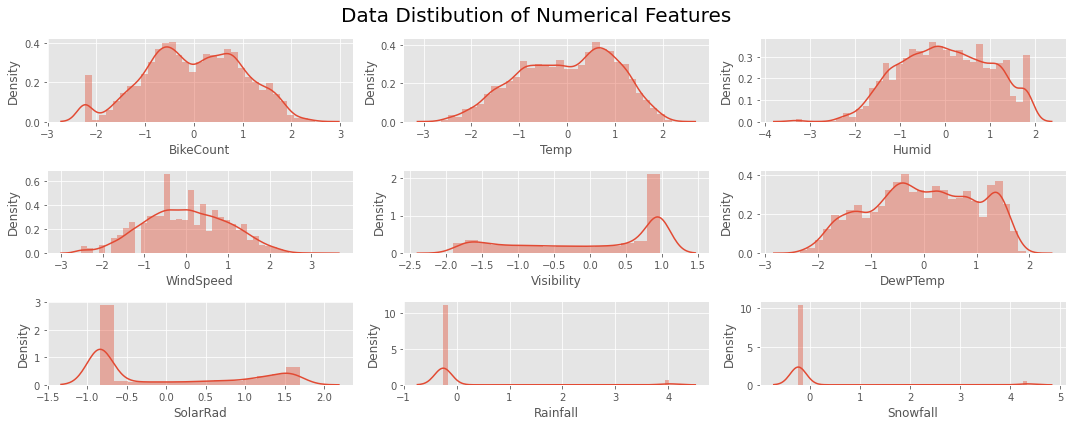

In [32]:
# checking for distribution after treating outliers.

# figsize
plt.figure(figsize=(15,6))
# title
plt.suptitle('Data Distibution of Numerical Features', fontsize=20)

for i,col in enumerate(var):
  # subplots 3 rows, 2 columns
  plt.subplot(3, 3, i+1)

  # dist plots
  sns.distplot(df[col])
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()

We can also observe some shifts in the distribution of the data after treating outliers. Some of the data were skewed before handling outliers, but after doing so, the features almost follow the normal distribution. Therefore, we are not utilizing the numerical feature transformation technique.

# 5. Feature Engineering

* Feature engineering is the process of transforming raw data into a set of meaningful, informative, and predictive features that can be used to train machine learning models. It involves selecting, creating, or modifying features in the dataset to enhance the performance and effectiveness of the models.
* It a critical step in machine learning because the quality and relevance of features can significantly impact the model's performance. Well-engineered features can help capture relevant patterns, relationships, and structures in the data, enabling the model to make accurate predictions or classifications

### 5.1 Correlation Coefficient/Heatmap
* The correlation coefficient is a statistical measure that quantifies the strength and direction of the linear relationship between two variables. It provides an indication of how closely the variables are related to each other. The correlation coefficient, often denoted as "r," ranges from -1 to 1.
* A correlation coefficient of 1 indicates a perfect positive linear relationship, where the variables increase or decrease together with a constant slope.
* A correlation coefficient of -1 indicates a perfect negative linear relationship, where the variables move in opposite directions with a constant slope.
* A correlation coefficient of 0 indicates no linear relationship between the variables.
* The correlation coefficient is calculated using the covariance between the variables divided by the product of their standard deviations.
* The correlation coefficient provides insight into the strength and direction of the relationship between variables.
However, it only measures linear relationships and does not capture other types of associations, such as nonlinear or complex dependencies.

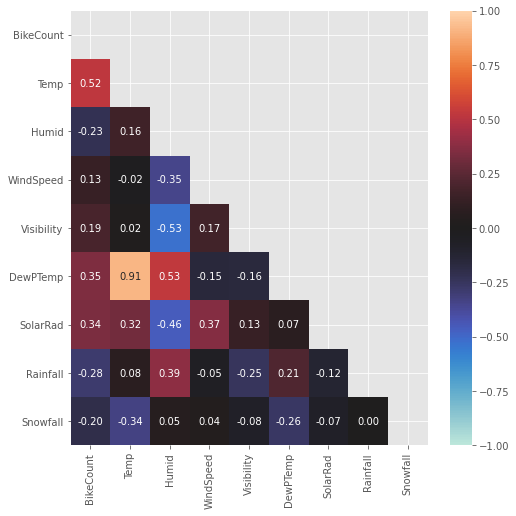

In [33]:
def corr_heatmap(df):
    # Exclude non-numeric columns
    numeric_columns = df.select_dtypes(include=np.number)
    
    plt.figure(figsize=(8, 8))
    mask = np.triu(np.ones_like(numeric_columns.corr(), dtype=bool))
    sns.heatmap(numeric_columns.corr(), mask=mask, vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='icefire')

corr_heatmap(df)

**Observation:**

From the above graph we could see that **Temperature** and **Dew Point Temperature** are highly corelated. We can drop one of them. As the corelation between Temperature and our dependent variable "Bike Rented Count" is high compared to Dew Point Temperature. So we will Keep the Temperature column and drop the Dew Point Temperature column.

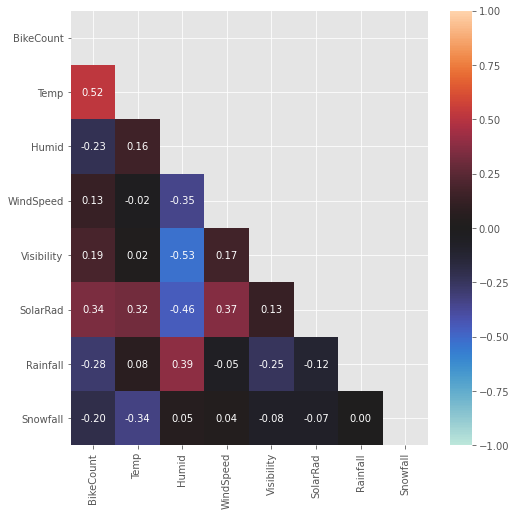

In [34]:
# droping Dew point temperature column due to multi-collinearity
new_df.drop('DewPTemp', axis=1, inplace=True)

corr_heatmap(new_df)

### 5.2 VIF 

* VIF, which stands for Variance Inflation Factor, is a measure used in regression analysis to assess multicollinearity among predictor variables.
* Multicollinearity occurs when predictor variables in a regression model are highly correlated with each other, which can cause issues in interpreting the individual effects of the variables and can lead to unstable and unreliable model estimates.
* The VIF quantifies the extent to which the variance of the estimated regression coefficient is inflated due to multicollinearity.
* It measures how much the variance of a particular predictor variable's estimated coefficient is increased compared to if that variable were uncorrelated with the other predictor variables in the model.

Interpreting VIF values:

* A VIF of 1 indicates no multicollinearity, meaning the predictor variable is not correlated with the other predictors.
* A VIF greater than 1 suggests some degree of multicollinearity, where higher values indicate stronger correlation with other predictors.
* A commonly used threshold is a VIF value of 5 or 10. Variables with VIF values exceeding these thresholds are considered to have high multicollinearity and may need to be addressed.
* By examining VIF values, researchers can identify predictor variables that contribute to multicollinearity and take appropriate actions, such as removing highly correlated variables, combining variables, or gathering additional data to mitigate the multicollinearity issue.

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

# multicollinearity result

print ('VIF w/ Dew Point Temperature:\n', calc_vif(df[[i for i in df.describe().columns if i not in ['BikeCount','Date']]]))

print ('\nVIF w/out Dew Point Temperature\n', calc_vif(new_df[[i for i in new_df.describe().columns if i not in ['BikeCount','Date']]]))

VIF w/ Dew Point Temperature:
     variables        VIF
0        Temp  45.786458
1       Humid  12.009217
2   WindSpeed   1.232661
3  Visibility   1.559788
4    DewPTemp  60.274115
5    SolarRad   1.858131
6    Rainfall   1.195148
7    Snowfall   1.166736

VIF w/out Dew Point Temperature
     variables       VIF
0        Temp  1.561902
1       Humid  2.437890
2   WindSpeed  1.232537
3  Visibility  1.496192
4    SolarRad  1.827230
5    Rainfall  1.194817
6    Snowfall  1.162319


After removing **DewPTemp**, VIF become stable.

As a result, Temp, Humid, WindSpeed, Visibility, SolarRad, Rainfall, Snowfall are our final numerical features for modeling. 

### 5.3 Encoding
Encoding refers to the process of converting categorical variables into numerical representations that can be understood and processed by machine learning algorithms. Since many machine learning algorithms require numerical inputs, encoding categorical variables becomes necessary.

Common techniques for encoding categorical variables include:

* One-Hot Encoding: This technique creates binary columns for each category in a categorical variable. Each category is represented by a separate binary column, where a value of 1 indicates the presence of that category and 0 indicates its absence. This approach allows algorithms to interpret categorical variables without assuming any ordinal relationship among the categories.

* Label Encoding: Label encoding assigns a unique numerical label to each category in a categorical variable. Each category is mapped to a corresponding numerical value. However, caution should be exercised with label encoding, as it may introduce an arbitrary ordinal relationship between the categories, which may not be appropriate for some algorithms.

* Ordinal Encoding: Similar to label encoding, ordinal encoding assigns numerical labels to categories. However, in ordinal encoding, the labels are assigned in a way that represents an ordered relationship between the categories. This can be useful when there is a natural order or hierarchy among the categories.

* Target Encoding: Target encoding replaces each category with the mean (or another statistical measure) of the target variable within that category. Target encoding can be helpful when the relationship between the categorical variable and the target variable is important for prediction. 

In [36]:
for i in categorical_features:
    print (f'No. of unique values in {i} is {new_df[i].nunique()}')
    print (f'{new_df[i].unique()}\n')

No. of unique values in Hour is 24
[0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]

No. of unique values in Seasons is 4
['Winter' 'Spring' 'Summer' 'Autumn']

No. of unique values in Holiday is 2
['No Holiday' 'Holiday']

No. of unique values in Functioning is 2
['Yes' 'No']

No. of unique values in Day is 7
['Friday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday']

No. of unique values in Month is 12
['December' 'January' 'February' 'March' 'April' 'May' 'June' 'July'
 'August' 'September' 'October' 'November']

No. of unique values in Year is 2
[2017 2018]



In [37]:
new_df.head(1)

,BikeCount,Hour,Temp,Humid,WindSpeed,Visibility,SolarRad,Rainfall,Snowfall,Seasons,Holiday,Functioning,Day,Month,Year
0,-0.530004,0,-1.524521,-1.038829,0.618103,0.978214,-0.845761,-0.252859,-0.230785,Winter,No Holiday,Yes,Friday,December,2017


For the categorical features, 

* Hour - **Change to *int64***
* Seasons - Since "Seasons" is a nominal categorical variable with four distinct categories, **one-hot encoding** is a suitable approach. 
* Holiday - **Numerical encoding**
* Functioning - **Drop**. As we check on 3.3.2 section, even though we have some counts of no functioning days, there is still no bike rented on a no functioning day, which means there is no insight from this feature.
* Day - Nomial, so **one-hot encoding**
* Month - Nomial, so **one-hot encoding**
* Year - **Drop**. It does not account for any information addition.

In [38]:
# hours
new_df['Hour'] = new_df['Hour'].astype(int)
new_df['Hour'].dtype

dtype('int32')

In [39]:
# Seasons
season_type = pd.get_dummies(new_df['Seasons'], prefix='Seasons')
new_df.drop('Seasons', axis=1, inplace=True)
new_df = pd.concat([new_df, season_type], axis=1)

new_df.head(1)


,BikeCount,Hour,Temp,Humid,WindSpeed,Visibility,SolarRad,Rainfall,Snowfall,Holiday,Functioning,Day,Month,Year,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,-0.530004,0,-1.524521,-1.038829,0.618103,0.978214,-0.845761,-0.252859,-0.230785,No Holiday,Yes,Friday,December,2017,0,0,0,1


In [40]:
# Holiday
new_df['Holiday'] = new_df['Holiday'].map({'Holiday': 1, 'No Holiday': 0})
new_df.head(5)

,BikeCount,Hour,Temp,Humid,WindSpeed,Visibility,SolarRad,Rainfall,Snowfall,Holiday,Functioning,Day,Month,Year,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,-0.530004,0,-1.524521,-1.038829,0.618103,0.978214,-0.845761,-0.252859,-0.230785,0,Yes,Friday,December,2017,0,0,0,1
1,-0.676497,1,-1.550870,-0.986482,-0.923651,0.978214,-0.845761,-0.252859,-0.230785,0,Yes,Friday,December,2017,0,0,0,1
2,-0.779424,2,-1.594819,-0.934363,-0.640327,0.978214,-0.845761,-0.252859,-0.230785,0,Yes,Friday,December,2017,0,0,0,1
3,-1.047379,3,-1.612409,-0.882465,-0.778203,0.978214,-0.845761,-0.252859,-0.230785,0,Yes,Friday,December,2017,0,0,0,1
4,-1.200315,4,-1.594819,-1.091410,0.700184,0.978214,-0.845761,-0.252859,-0.230785,0,Yes,Friday,December,2017,0,0,0,1


In [41]:
# Functioning
new_df['Functioning'] = new_df['Functioning'].map({'Yes': 1, 'No': 0})
new_df.head(1)

,BikeCount,Hour,Temp,Humid,WindSpeed,Visibility,SolarRad,Rainfall,Snowfall,Holiday,Functioning,Day,Month,Year,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,-0.530004,0,-1.524521,-1.038829,0.618103,0.978214,-0.845761,-0.252859,-0.230785,0,1,Friday,December,2017,0,0,0,1


In [42]:
# Day
new_df['Day'] = new_df['Day'].map({'Sunday': 0, 'Monday': 1, 'Tuesday': 2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6})
new_df.head(5)

,BikeCount,Hour,Temp,Humid,WindSpeed,Visibility,SolarRad,Rainfall,Snowfall,Holiday,Functioning,Day,Month,Year,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,-0.530004,0,-1.524521,-1.038829,0.618103,0.978214,-0.845761,-0.252859,-0.230785,0,1,5,December,2017,0,0,0,1
1,-0.676497,1,-1.550870,-0.986482,-0.923651,0.978214,-0.845761,-0.252859,-0.230785,0,1,5,December,2017,0,0,0,1
2,-0.779424,2,-1.594819,-0.934363,-0.640327,0.978214,-0.845761,-0.252859,-0.230785,0,1,5,December,2017,0,0,0,1
3,-1.047379,3,-1.612409,-0.882465,-0.778203,0.978214,-0.845761,-0.252859,-0.230785,0,1,5,December,2017,0,0,0,1
4,-1.200315,4,-1.594819,-1.091410,0.700184,0.978214,-0.845761,-0.252859,-0.230785,0,1,5,December,2017,0,0,0,1


In [43]:
# Month
new_df['Month'] = new_df['Month'].map({'January': 1, 'February': 2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12})
new_df.head(5)

,BikeCount,Hour,Temp,Humid,WindSpeed,Visibility,SolarRad,Rainfall,Snowfall,Holiday,Functioning,Day,Month,Year,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,-0.530004,0,-1.524521,-1.038829,0.618103,0.978214,-0.845761,-0.252859,-0.230785,0,1,5,12,2017,0,0,0,1
1,-0.676497,1,-1.550870,-0.986482,-0.923651,0.978214,-0.845761,-0.252859,-0.230785,0,1,5,12,2017,0,0,0,1
2,-0.779424,2,-1.594819,-0.934363,-0.640327,0.978214,-0.845761,-0.252859,-0.230785,0,1,5,12,2017,0,0,0,1
3,-1.047379,3,-1.612409,-0.882465,-0.778203,0.978214,-0.845761,-0.252859,-0.230785,0,1,5,12,2017,0,0,0,1
4,-1.200315,4,-1.594819,-1.091410,0.700184,0.978214,-0.845761,-0.252859,-0.230785,0,1,5,12,2017,0,0,0,1


In [44]:
# Year
new_df.drop('Year', axis=1, inplace=True)
new_df.head(1)

,BikeCount,Hour,Temp,Humid,WindSpeed,Visibility,SolarRad,Rainfall,Snowfall,Holiday,Functioning,Day,Month,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,-0.530004,0,-1.524521,-1.038829,0.618103,0.978214,-0.845761,-0.252859,-0.230785,0,1,5,12,0,0,0,1


## 5.4 Normalization of Target Variable
A fundamental component of data mining is data normalization, also known as data pre-processing. It refers to transforming the data, specifically converting the source data into a different format that makes it possible to effectively process the data. Data normalization's primary goal is to reduce or even eliminate duplicate data.

In [45]:
# fig, ax = plt.subplots(1,2 , figsize = (15,5))

# # Distribution plot of Rented Bike Count
# dist =sns.distplot(new_df['BikeCount'],hist=True, ax = ax[0])
# dist.set(xlabel = 'Rented Bike Count', ylabel ='Density', title = 'Distribution Plot of Target Variable')

# # mean line
# dist.axvline(new_df['BikeCount'].mean(), color='magenta', linestyle='dashed', linewidth=2)
# # median line
# dist.axvline(new_df['BikeCount'].median(), color='black', linestyle='dashed', linewidth=2)

# # Boxplot
# box = sns.boxplot(new_df.BikeCount, ax= ax[1])
# box.set(title = 'Outlier Analysis of Target Variable')
# plt.show()

**Observation:**

The graph above indicates that the Rented Bike Count has a moderate right skewness. Linear regression assumes that the dependent variable has a normal distribution, therefore, to meet this assumption, we need to take some measures to normalize the distribution.

The boxplot above indicates that there are outliers in the rented bike count column.

In [46]:
# #apply diffrent tranformation technique and checking data distributation
# fig,axes = plt.subplots(1,4,figsize=(20,5))
# sns.distplot((new_df['BikeCount']),ax=axes[0],color='brown').set_title("Original data");

# # here we use log10
# #transform only posible in positive value and >0 value so add 0.0000001 in data
# sns.distplot(np.log1p(new_df['BikeCount']),ax=axes[1],color='red').set_title("log1p");

# # here we use square root
# sns.distplot(np.sqrt(new_df['BikeCount']),ax=axes[2], color='blue').set_title("Square root");

# # here we use cube root
# sns.distplot(np.cbrt(new_df['BikeCount']),ax=axes[3], color='green').set_title("cube root");

**Observations:**

* Applying a logarithmic transformation to the dependent variable did not help much as it resulted in a negatively skewed distribution.
* Square root and cube root transformations were attempted, but they both have result similar. We will look into more in detail with graph to show which one is transformed well.

In [47]:
# fig, ax = plt.subplots(1,2 , figsize = (15,5))

# #  checking square root tranformation in our target variable
# dist =sns.distplot(np.sqrt(new_df['BikeCount']), ax = ax[0])
# dist.set(xlabel = 'Rented Bike Count', ylabel ='Density', title = 'Distribution Plot of Target Variable in sqrt tranformation')

# # mean line
# dist.axvline(np.sqrt(new_df['BikeCount']).mean(), color='magenta', linestyle='dashed', linewidth=2)
# # median line
# dist.axvline(np.sqrt(new_df['BikeCount']).median(), color='black', linestyle='dashed', linewidth=2)

# # Boxplot
# box = sns.boxplot(np.sqrt(new_df.BikeCount), ax= ax[1])
# box.set(title = 'Outlier Analysis of Target Variable in sqrt tranformation')
# plt.show()

In [48]:
# fig, ax = plt.subplots(1,2 , figsize = (15,5))

# #  checking square root tranformation in our target variable
# dist =sns.distplot(np.cbrt(new_df['BikeCount']), ax = ax[0])
# dist.set(xlabel = 'Rented Bike Count', ylabel ='Density', title = 'Distribution Plot of Target Variable in cbrt tranformation')

# # mean line
# dist.axvline(np.cbrt(new_df['BikeCount']).mean(), color='magenta', linestyle='dashed', linewidth=2)
# # median line
# dist.axvline(np.cbrt(new_df['BikeCount']).median(), color='black', linestyle='dashed', linewidth=2)

# # Boxplot
# box = sns.boxplot(np.cbrt(new_df.BikeCount), ax= ax[1])
# box.set(title = 'Outlier Analysis of Target Variable in cbrt tranformation')
# plt.show()

**Observations:**

* We will use a cube root transformation for the regression as it transformed the variable into a well-distributed form.

**Manipulations done and insights found**

1. We checked for correlation coefficient and found that most of the numerical features are positively correlated to our target variable.
2. From heatmap and correlation coefficient, **DewPTemp** and **Temp** have a correlation coefficient of 0.91 and **DewPTemp** is less correlated to our target variable hence we dropped **DewPTemp**.
3. We encoded our categorical features which are necessary for the model to understand. We used :
* *one-hot encoding* for **Seasons**, **Day**, and **Month** since these features are nominal feature
* *numeric encoding* for **Holiday**, especially for **Hour** by just changing data type into integer from categorical.
* *Drop* for **Functioning** since no bike rented count on no functional day and **Year** since it does not include any insights
4. To treat our target variable, we applied three transformations (logarithmic, square root, cute root) to the target variable, and we decided the one with cute root transformations.

# 6. Modeling

### 6.1 Train and Test Split

In [49]:
X = new_df.drop('BikeCount', axis=1)
y = new_df['BikeCount']

In [50]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7008, 16)
(1752, 16)
(7008,)
(1752,)


### 6.2 Scaling data

In [51]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 6.3 Model Implementation
**Evaluation Metrics Used:**

* The mean squared error (MSE): It tells you how close a regression line is to a set of points.
* Root Mean Square Error (RMSE): It is the standard deviation of the residuals (prediction errors).
* Mean Absolute Error (MAE): These are metrics used to evaluate a Regression Model. ... Here, errors are the absolute differences between the predicted values (values predicted by our regression model) and the actual values of a variable.
* R-squared (R2): It is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.
* Adjusted R-squared: It is a modified version of R-squared that has been adjusted for the number of predictors in the model.​

In [52]:
# empty list for appending performance metric score 
#model_result = []
model_result = pd.DataFrame()

def predict(ml_model, model_name):

  '''
  Pass the model and predict value. 
  Function will calculate all the evaluation metrics and appending those metrics score on model_result list.
  Plotting different graphs for test data.
  ''' 
  global model_result
  
  # model fitting
  model = ml_model.fit(X_train, y_train)

  # predicting values
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)

  # Reverse the transformation on the predictions    (In case if we need y_train_pred in original and transformed way)
  y_train_pred_original = np.power(y_train_pred, 1/3)
  y_test_pred_original = np.power(y_test_pred, 1/3)
  
  # Cross-validation 
  acc_score = cross_val_score(ml_model, X = X_train, y = y_train, cv = 5)

  # graph --> best fit line on test data
  sns.regplot(x = y_test_pred, y = y_test, line_kws={'color':'red'})
  plt.xlabel('Predicted')
  plt.ylabel('Actual')

  '''Evaluation metrics on train data'''
  train_MSE  = round(mean_squared_error(y_train, y_train_pred),3)
  train_RMSE = round(np.sqrt(train_MSE),3)
  train_r2 = round(r2_score(y_train, y_train_pred),3)
  train_MAE = round(mean_absolute_error(y_train, y_train_pred),3)
  train_adj_r2 = round(1-(1-r2_score(y_train, y_train_pred))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)),3)
  cross_val = round(acc_score.mean()*100, 3)
  print(f'train MSE : {train_MSE}')
  print(f'train RMSE : {train_RMSE}')
  print(f'train MAE : {train_MAE}')
  print(f'train R2 : {train_r2}')
  print(f'train Adj R2 : {train_adj_r2}')
  print(f'Cross-Val Accuracy (%) : {cross_val}')
  print('-'*150)

  '''Evaluation metrics on test data'''
  test_MSE  = round(mean_squared_error(y_test, y_test_pred),3)
  test_RMSE = round(np.sqrt(test_MSE),3)
  test_r2 = round(r2_score(y_test, y_test_pred),3)
  test_MAE = round(mean_absolute_error(y_test, y_test_pred),3)
  test_adj_r2 = round(1-(1-r2_score(y_test, y_test_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),3)
  print(f'test MSE : {test_MSE}')
  print(f'test RMSE : {test_RMSE}')
  print(f'test MAE : {test_MAE}')
  print(f'test R2 : {test_r2}')
  print(f'test Adj R2 : {test_adj_r2}')
  print('-'*150)

  # graph --> actual vs predicted on test data
  plt.figure(figsize=(6,5))
  plt.plot((y_test_pred)[:20])
  plt.plot(np.array((y_test)[:20]))
  plt.legend(["Predicted","Actual"])
  plt.xlabel('Test Data on last 20 points')
  plt.show()
  print('-'*150)

  '''actual vs predicted value on test data'''
  d = {'y_actual':y_test, 'y_predict':y_test_pred, 'error':y_test-y_test_pred}
  print(pd.DataFrame(data=d).head().T)
  print('-'*150)

  # using the score from the performance metrics to create the final model_result.
  result_dic = {'train MSE':train_MSE,
                       'test MSE':test_MSE,
                       'train RMSE':train_RMSE,
                       'Cross Validation %':cross_val,
                       'test RMSE':test_RMSE,
                       'train MAE':train_MAE,
                       'test MAE':test_MAE,
                       'train R2':train_r2,
                       'test R2':test_r2,
                       'train Adj R2':train_adj_r2,
                       'test Adj R2':test_adj_r2}
  
  # Append results to the model_result DataFrame
  model_result = model_result.append(pd.Series(result_dic, name = model_name))


#### 6.3.1 Linear Regression
Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables by fitting a linear equation to the observed data. The goal is to find the best-fitting line that can predict the value of the dependent variable based on the values of the independent variables.

train MSE : 0.282
train RMSE : 0.531
train MAE : 0.411
train R2 : 0.719
train Adj R2 : 0.718
Cross-Val Accuracy (%) : 71.694
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 0.288
test RMSE : 0.537
test MAE : 0.413
test R2 : 0.709
test Adj R2 : 0.706
------------------------------------------------------------------------------------------------------------------------------------------------------


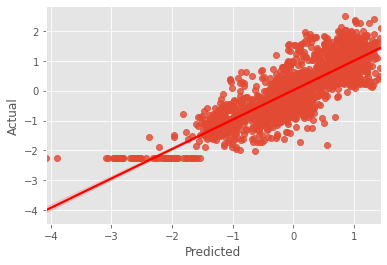

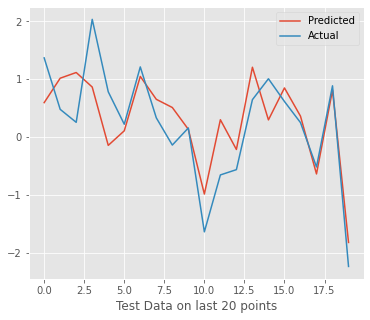

------------------------------------------------------------------------------------------------------------------------------------------------------
               6056      5556      5990      7674      3319
y_actual   1.369246  0.479421  0.254929  2.035583  0.783001
y_predict  0.595303  1.017990  1.116471  0.864882 -0.143555
error      0.773943 -0.538569 -0.861541  1.170701  0.926557
------------------------------------------------------------------------------------------------------------------------------------------------------


,Cross Validation %,test Adj R2,test MAE,test MSE,test R2,test RMSE,train Adj R2,train MAE,train MSE,train R2,train RMSE
LinearRegression,71.694,0.706,0.413,0.288,0.709,0.537,0.718,0.411,0.282,0.719,0.531


In [53]:
predict(LinearRegression(), 'LinearRegression')

model_result

#### 6.3.2 Decision Tree
A decision tree is a tree-like model used in machine learning to make predictions or decisions by breaking down a set of rules or conditions into smaller and smaller sub-conditions, based on the values of the input features.

Each node in the tree represents a test on a feature, and each branch represents the outcome of the test. The final branches of the tree, called the leaves, represent the class predictions or decisions. The tree is built recursively by finding the best feature to split the data based on the information gain or decrease in impurity at each node.

train MSE : 0.0
train RMSE : 0.0
train MAE : 0.0
train R2 : 1.0
train Adj R2 : 1.0
Cross-Val Accuracy (%) : 86.817
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 0.116
test RMSE : 0.341
test MAE : 0.207
test R2 : 0.883
test Adj R2 : 0.882
------------------------------------------------------------------------------------------------------------------------------------------------------


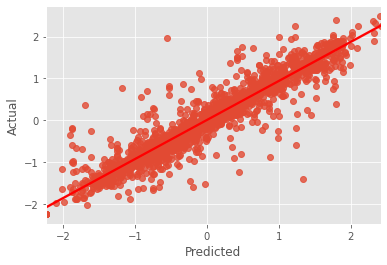

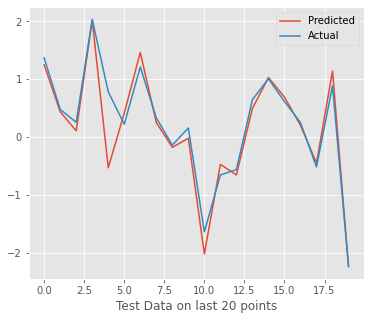

------------------------------------------------------------------------------------------------------------------------------------------------------
               6056      5556      5990      7674      3319
y_actual   1.369246  0.479421  0.254929  2.035583  0.783001
y_predict  1.249352  0.439380  0.107745  2.021465 -0.530004
error      0.119894  0.040041  0.147184  0.014119  1.313006
------------------------------------------------------------------------------------------------------------------------------------------------------


,Cross Validation %,test Adj R2,test MAE,test MSE,test R2,test RMSE,train Adj R2,train MAE,train MSE,train R2,train RMSE
LinearRegression,71.694,0.706,0.413,0.288,0.709,0.537,0.718,0.411,0.282,0.719,0.531
Decision Tree,86.817,0.882,0.207,0.116,0.883,0.341,1.000,0.000,0.000,1.000,0.000


In [54]:
predict(DecisionTreeRegressor(), 'Decision Tree')

model_result

#### 6.3.3 Random Forest
Random Forest is an ensemble machine learning algorithm that builds multiple decision trees and combines their predictions to make a final classification or regression prediction. In contrast to a single decision tree, Random Forest reduces the risk of overfitting by combining the results of many trees, each built on a different subset of the data.

In [55]:
param_grid = {'n_estimators': [50,80],       # number of trees in the ensemble
             'max_depth': [15,20],           # maximum number of levels allowed in each tree.
             'min_samples_split': [5,15],    # minimum number of samples necessary in a node to cause node splitting.
             'min_samples_leaf': [3,5]}      # minimum number of samples which can be stored in a tree leaf.


# Initialize the RandomForestRegressor model
rf = RandomForestRegressor()

# Use GridSearchCV to perform a grid search over the parameter grid
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5, scoring='r2')

# Fit the model to the training data
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [15, 20], 'min_samples_leaf': [3, 5],
                         'min_samples_split': [5, 15],
                         'n_estimators': [50, 80]},
             scoring='r2')

In [56]:
# Get the best parameters from the grid search
rf_optimal_model = grid_search.best_estimator_
rf_optimal_model

RandomForestRegressor(max_depth=15, min_samples_leaf=3, min_samples_split=5,
                      n_estimators=80)

train MSE : 0.025
train RMSE : 0.158
train MAE : 0.102
train R2 : 0.975
train Adj R2 : 0.975
Cross-Val Accuracy (%) : 92.87
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 0.059
test RMSE : 0.243
test MAE : 0.16
test R2 : 0.94
test Adj R2 : 0.94
------------------------------------------------------------------------------------------------------------------------------------------------------


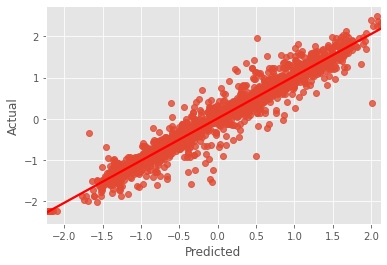

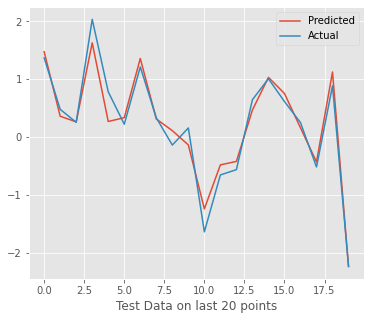

------------------------------------------------------------------------------------------------------------------------------------------------------
               6056      5556      5990      7674      3319
y_actual   1.369246  0.479421  0.254929  2.035583  0.783001
y_predict  1.475404  0.360129  0.263013  1.629759  0.269700
error     -0.106158  0.119293 -0.008083  0.405825  0.513302
------------------------------------------------------------------------------------------------------------------------------------------------------


,Cross Validation %,test Adj R2,test MAE,test MSE,test R2,test RMSE,train Adj R2,train MAE,train MSE,train R2,train RMSE
LinearRegression,71.694,0.706,0.413,0.288,0.709,0.537,0.718,0.411,0.282,0.719,0.531
Decision Tree,86.817,0.882,0.207,0.116,0.883,0.341,1.000,0.000,0.000,1.000,0.000
Random Forest,92.870,0.940,0.160,0.059,0.940,0.243,0.975,0.102,0.025,0.975,0.158


In [57]:
predict(rf_optimal_model,  'Random Forest') #RandomForestRegressor(n_estimators=10,random_state=0) 93

model_result

**Random Forest Model Explainability**

In [58]:
# feature importance 
importances = rf_optimal_model.feature_importances_

# Creating a dictonary 
importance_dict = {'Feature' : list(X.columns),
                   'Feature Importance' : importances}

# Creating the dataframe
importance = pd.DataFrame(importance_dict)
sorting_features = importance.sort_values(by=['Feature Importance'],ascending=False)
sorting_features

,Feature,Feature Importance
1,Temp,0.301172
0,Hour,0.220283
9,Functioning,0.192773
2,Humid,0.121519
6,Rainfall,0.050791
5,SolarRad,0.024776
10,Day,0.022041
15,Seasons_Winter,0.021755
11,Month,0.012563
12,Seasons_Autumn,0.009218


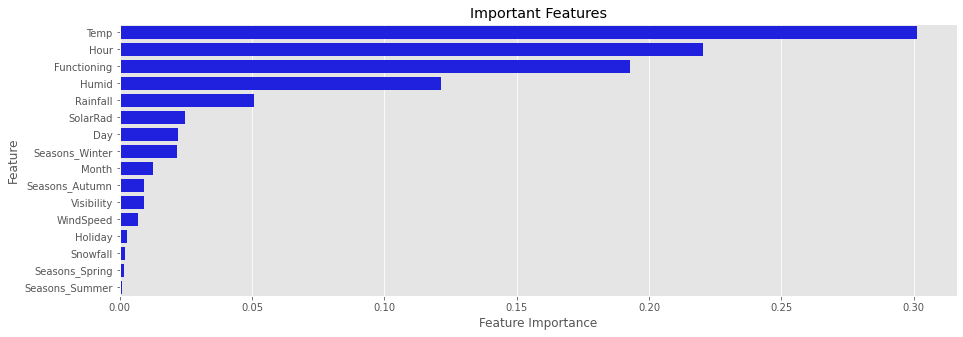

In [59]:
# plotting feature importance graph
plt.figure(figsize=(15,5))
bar = sns.barplot(x='Feature Importance', y='Feature', data=sorting_features, color='blue')
bar.set_title('Important Features')
plt.show()

The top 5 important features in Random Forest are temperature, hour, functioning_day, humidity, and rainfall.

#### 6.3.4 Support Vector Machine
Support Vector Machine (SVM) is a popular and powerful machine learning algorithm for classification and regression problems. It is based on the concept of finding the best hyperplane that separates the data into classes, or predicts the target value for regression problems.

train MSE : 0.056
train RMSE : 0.237
train MAE : 0.152
train R2 : 0.944
train Adj R2 : 0.944
Cross-Val Accuracy (%) : 89.326
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 0.102
test RMSE : 0.319
test MAE : 0.214
test R2 : 0.897
test Adj R2 : 0.896
------------------------------------------------------------------------------------------------------------------------------------------------------


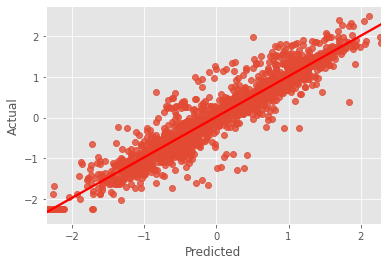

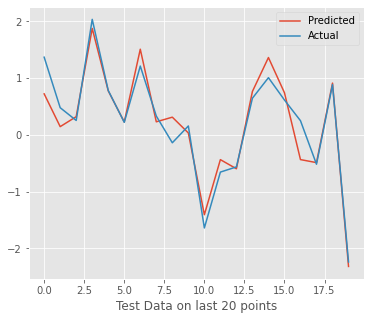

------------------------------------------------------------------------------------------------------------------------------------------------------
               6056      5556      5990      7674      3319
y_actual   1.369246  0.479421  0.254929  2.035583  0.783001
y_predict  0.723198  0.145881  0.321654  1.875361  0.776468
error      0.646048  0.333540 -0.066724  0.160222  0.006533
------------------------------------------------------------------------------------------------------------------------------------------------------


,Cross Validation %,test Adj R2,test MAE,test MSE,test R2,test RMSE,train Adj R2,train MAE,train MSE,train R2,train RMSE
LinearRegression,71.694,0.706,0.413,0.288,0.709,0.537,0.718,0.411,0.282,0.719,0.531
Decision Tree,86.817,0.882,0.207,0.116,0.883,0.341,1.000,0.000,0.000,1.000,0.000
Random Forest,92.870,0.940,0.160,0.059,0.940,0.243,0.975,0.102,0.025,0.975,0.158
SVM,89.326,0.896,0.214,0.102,0.897,0.319,0.944,0.152,0.056,0.944,0.237


In [60]:
predict(SVR(kernel='rbf',C=100), 'SVM')
model_result

#### 6.3.5 Xtreme Gradient Boosting
XGBoost (eXtreme Gradient Boosting) is an optimized implementation of the Gradient Boosting algorithm that is specifically designed for large-scale and complex data. XGBoost is an ensemble learning algorithm that builds multiple decision trees and combines their predictions to make a final prediction.

In [61]:
param_grid = {'n_estimators': [300,500],     # number of trees in the ensemble
             'max_depth': [7,8],             # maximum number of levels allowed in each tree.
             'min_samples_split': [3,5],     # minimum number of samples necessary in a node to cause node splitting.
             'min_samples_leaf': [3,5]}      # minimum number of samples which can be stored in a tree leaf.


# Initialize the RandomForestRegressor model
xgb = XGBRegressor()

# Use GridSearchCV to perform a grid search over the parameter grid
grid_search = GridSearchCV(xgb, param_grid=param_grid, cv=5, scoring='r2')

# Fit the model to the training data
grid_search.fit(X, y)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'max_depth': [7, 8], 'min_samples_leaf': [3, 5],
                         'min_samples_split': [3, 5],
                         'n_estimators': [300, 500]},
             scoring='r2')

In [62]:
# Get the best parameters from the grid search
xgb_optimal_model = grid_search.best_estimator_
xgb_optimal_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, min_samples_leaf=3, min_samples_split=3,
             missing=nan, monotone_constraints=None, multi_strategy=None,
             n_estimators=300, n_jobs=None, ...)

train MSE : 0.0
train RMSE : 0.0
train MAE : 0.003
train R2 : 1.0
train Adj R2 : 1.0
Cross-Val Accuracy (%) : 94.785
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 0.045
test RMSE : 0.212
test MAE : 0.134
test R2 : 0.954
test Adj R2 : 0.954
------------------------------------------------------------------------------------------------------------------------------------------------------


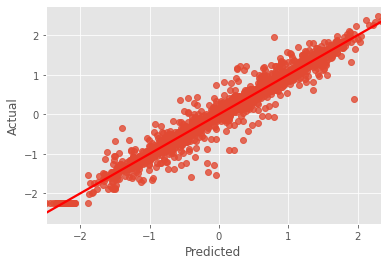

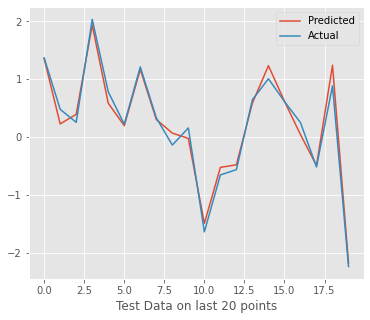

------------------------------------------------------------------------------------------------------------------------------------------------------
               6056      5556      5990      7674      3319
y_actual   1.369246  0.479421  0.254929  2.035583  0.783001
y_predict  1.355336  0.228023  0.393639  1.936899  0.585496
error      0.013910  0.251398 -0.138710  0.098684  0.197506
------------------------------------------------------------------------------------------------------------------------------------------------------


,Cross Validation %,test Adj R2,test MAE,test MSE,test R2,test RMSE,train Adj R2,train MAE,train MSE,train R2,train RMSE
LinearRegression,71.694,0.706,0.413,0.288,0.709,0.537,0.718,0.411,0.282,0.719,0.531
Decision Tree,86.817,0.882,0.207,0.116,0.883,0.341,1.000,0.000,0.000,1.000,0.000
Random Forest,92.870,0.940,0.160,0.059,0.940,0.243,0.975,0.102,0.025,0.975,0.158
SVM,89.326,0.896,0.214,0.102,0.897,0.319,0.944,0.152,0.056,0.944,0.237
XGB,94.785,0.954,0.134,0.045,0.954,0.212,1.000,0.003,0.000,1.000,0.000


In [63]:
predict(xgb_optimal_model, 'XGB')

model_result

**XGBoost Model Explainability**

In [64]:
# feature importance 
importances = xgb_optimal_model.feature_importances_

# Creating a dictonary 
importance_dict = {'Feature' : list(X.columns),
                   'Feature Importance' : importances}

# Creating the dataframe
importance = pd.DataFrame(importance_dict)
sorting_features = importance.sort_values(by=['Feature Importance'],ascending=False)
sorting_features

,Feature,Feature Importance
9,Functioning,0.685443
15,Seasons_Winter,0.178253
6,Rainfall,0.062193
1,Temp,0.014259
0,Hour,0.011975
8,Holiday,0.010760
12,Seasons_Autumn,0.009143
2,Humid,0.007736
11,Month,0.004778
10,Day,0.004350


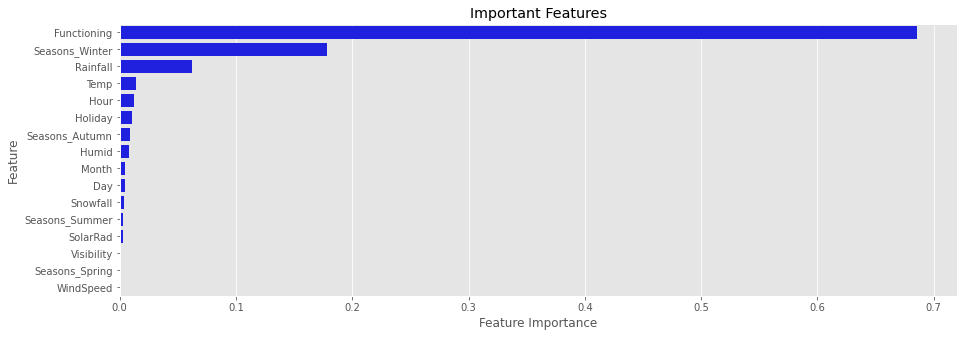

In [65]:
# plotting feature importance graph
plt.figure(figsize=(15,5))
bar = sns.barplot(x='Feature Importance', y='Feature', data=sorting_features, color='blue')
bar.set_title('Important Features')
plt.show()

The top 5 important features in XGB Model are functioning_day, season_winter, rainfall, temperature, and hour.

#### 6.3.6 Light GBM
LightGBM is a gradient boosting framework that uses tree-based learning algorithms. It is designed to be more efficient than traditional gradient boosting algorithms and is particularly well-suited for large datasets.LightGBM is an open-source library that was developed by Microsoft.

One of the key features of LightGBM is its use of a histogram-based approach to split nodes in decision trees.

In [66]:
param_grid = {'n_estimators': [600,800],     # number of trees in the ensemble
             'max_depth': [8,10],            # maximum number of levels allowed in each tree.
             'min_samples_split': [3,5],     # minimum number of samples necessary in a node to cause node splitting.
             'min_samples_leaf': [2,3]}      # minimum number of samples which can be stored in a tree leaf.


# Initialize the RandomForestRegressor model
lgb = LGBMRegressor()

# Use GridSearchCV to perform a grid search over the parameter grid
grid_search = GridSearchCV(lgb, param_grid=param_grid, cv=5, scoring='r2')

# Fit the model to the training data
grid_search.fit(X, y)

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=2. Current value: min_data_in_leaf=2
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=2. Current value: min_data_in_leaf=2
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003451 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 983
[LightGBM] [Info] Number of data points in the train set: 7008, numbe

GridSearchCV(cv=5, estimator=LGBMRegressor(),
             param_grid={'max_depth': [8, 10], 'min_samples_leaf': [2, 3],
                         'min_samples_split': [3, 5],
                         'n_estimators': [600, 800]},
             scoring='r2')

In [67]:
# Get the best parameters from the grid search
lgb_optimal_model = grid_search.best_estimator_
lgb_optimal_model

LGBMRegressor(max_depth=10, min_samples_leaf=3, min_samples_split=3,
              n_estimators=600)

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=3. Current value: min_data_in_leaf=3
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=3. Current value: min_data_in_leaf=3
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000730 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1009
[LightGBM] [Info] Number of data points in the train set: 7008, numb

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=3. Current value: min_data_in_leaf=3
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=3. Current value: min_data_in_leaf=3
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=3. Current value: min_data_in_leaf=3
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leav

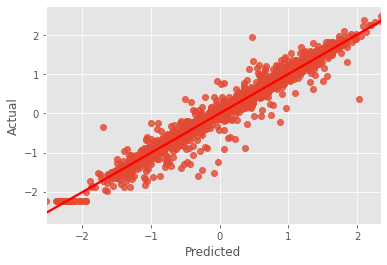

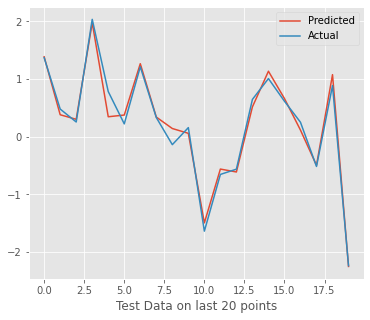

------------------------------------------------------------------------------------------------------------------------------------------------------
               6056      5556      5990      7674      3319
y_actual   1.369246  0.479421  0.254929  2.035583  0.783001
y_predict  1.386439  0.380655  0.301601  1.976940  0.345861
error     -0.017193  0.098766 -0.046672  0.058643  0.437141
------------------------------------------------------------------------------------------------------------------------------------------------------


,Cross Validation %,test Adj R2,test MAE,test MSE,test R2,test RMSE,train Adj R2,train MAE,train MSE,train R2,train RMSE
LinearRegression,71.694,0.706,0.413,0.288,0.709,0.537,0.718,0.411,0.282,0.719,0.531
Decision Tree,86.817,0.882,0.207,0.116,0.883,0.341,1.000,0.000,0.000,1.000,0.000
Random Forest,92.870,0.940,0.160,0.059,0.940,0.243,0.975,0.102,0.025,0.975,0.158
SVM,89.326,0.896,0.214,0.102,0.897,0.319,0.944,0.152,0.056,0.944,0.237
XGB,94.785,0.954,0.134,0.045,0.954,0.212,1.000,0.003,0.000,1.000,0.000
LGB,95.467,0.958,0.124,0.041,0.958,0.202,0.996,0.043,0.004,0.996,0.063


In [68]:
predict(lgb_optimal_model, 'LGB')

model_result

**LightGBM Model Explainability**

In [69]:
# feature importance 
importances = lgb_optimal_model.feature_importances_

#Creating a dictonary 
importance_dict = {'Feature' : list(X.columns),
                   'Feature Importance' : importances}

#Creating the dataframe
importance = pd.DataFrame(importance_dict)
sorting_features = importance.sort_values(by=['Feature Importance'],ascending=False)
sorting_features

,Feature,Feature Importance
1,Temp,3127
2,Humid,2533
0,Hour,2387
4,Visibility,2305
3,WindSpeed,1962
10,Day,1738
5,SolarRad,1566
11,Month,979
6,Rainfall,579
8,Holiday,207


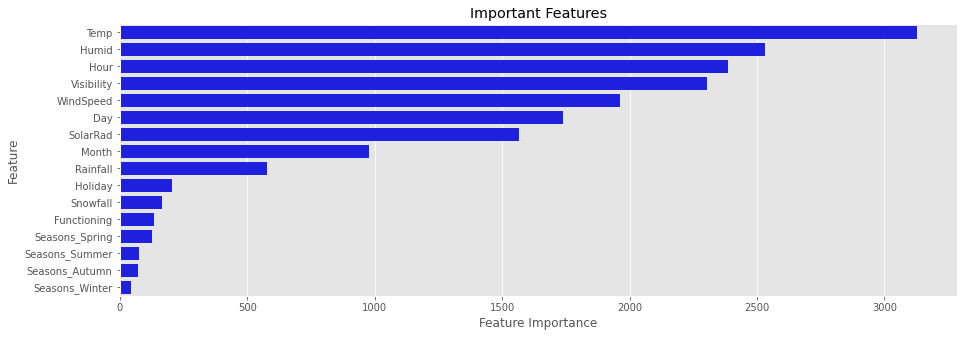

In [70]:
# plotting feature importance graph
plt.figure(figsize=(15,5))
bar=sns.barplot(x='Feature Importance', y='Feature', data=sorting_features, color='blue')
bar.set_title('Important Features')
plt.show()

The top 5 important features in LightGBM Model are temperature, humidity, hour, visibility, and windspeed.

#### 6.3.7 Model Result
The fit of the model to the dependent variables can be evaluated using the R square measure. On the other hand, overfitting is not taken into consideration. If there are a lot of independent variables in the regression model, it may work well with training data but fail with testing data because it is too complicated. Adjusted R Square is a new metric that penalizes additional independent variables added to the model and adjusts the metric to prevent overfitting.

Because it estimates the relationship between the movements of a dependent variable and those of an independent variable, R square is the best evaluation method for predicting the rented_bike_count.

In [71]:
model_result

,Cross Validation %,test Adj R2,test MAE,test MSE,test R2,test RMSE,train Adj R2,train MAE,train MSE,train R2,train RMSE
LinearRegression,71.694,0.706,0.413,0.288,0.709,0.537,0.718,0.411,0.282,0.719,0.531
Decision Tree,86.817,0.882,0.207,0.116,0.883,0.341,1.000,0.000,0.000,1.000,0.000
Random Forest,92.870,0.940,0.160,0.059,0.940,0.243,0.975,0.102,0.025,0.975,0.158
SVM,89.326,0.896,0.214,0.102,0.897,0.319,0.944,0.152,0.056,0.944,0.237
XGB,94.785,0.954,0.134,0.045,0.954,0.212,1.000,0.003,0.000,1.000,0.000
LGB,95.467,0.958,0.124,0.041,0.958,0.202,0.996,0.043,0.004,0.996,0.063


In [72]:
model_result.sort_values(by='test R2', ascending=False)


,Cross Validation %,test Adj R2,test MAE,test MSE,test R2,test RMSE,train Adj R2,train MAE,train MSE,train R2,train RMSE
LGB,95.467,0.958,0.124,0.041,0.958,0.202,0.996,0.043,0.004,0.996,0.063
XGB,94.785,0.954,0.134,0.045,0.954,0.212,1.000,0.003,0.000,1.000,0.000
Random Forest,92.870,0.940,0.160,0.059,0.940,0.243,0.975,0.102,0.025,0.975,0.158
SVM,89.326,0.896,0.214,0.102,0.897,0.319,0.944,0.152,0.056,0.944,0.237
Decision Tree,86.817,0.882,0.207,0.116,0.883,0.341,1.000,0.000,0.000,1.000,0.000
LinearRegression,71.694,0.706,0.413,0.288,0.709,0.537,0.718,0.411,0.282,0.719,0.531


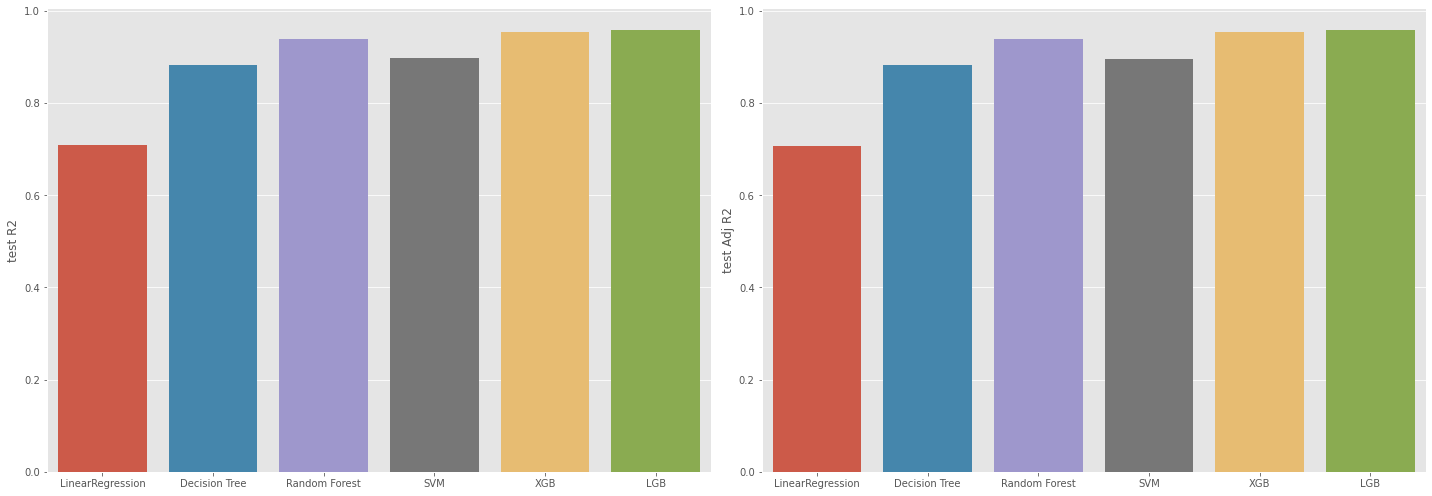

In [73]:
# plotting graph to compare model performance of all the models
fig, ax = plt.subplots(1,2, figsize=(20,7))
sns.barplot(x = model_result.index, y = model_result['test R2'], ax = ax[0])           # Model Vs test R2
sns.barplot(x = model_result.index, y = model_result['test Adj R2'], ax = ax[1])       # Model Vs test Adj R2
plt.tight_layout()
plt.show()

**From the above result, we can select LGB Regressor as the final model because it has the lowest RMSE value as well as the highest R2 score on the test data. I would go with LGB because it is considered a better model for large dataset and it is explaining the features which it is taking into account in better manner.**

# 7. Conclusion

**Summary**

We began our analysis by performing EDA on all of our datasets. First, we looked at and changed our dependent variable, "Rental Bike Count." After that, we looked at categorical variables and numerical variables and discovered their correlation, distribution, and connection to the dependent variable. Additionally, we hot-encoded the categorical variables and removed some numerical features which are used only for EDA purposes and have multi-collinearity.

Following that, we examine several well-known individual models, ranging from straightforward Linear Regression to more complex and ensemble models like Random Forest, Gradient Boost, and Light GBM. To enhance the performance of our model, we performed hyperparameter tuning.

**Conclusion**
1. Here are some solutions to manage Bike Sharing Demand.
* The majority of rentals are for daily commutes to workplaces and colleges. Therefore open additional stations near these landmarks to reach their primary customers.
* While planning for extra bikes to stations the peak rental hours must be considered, i.e. 7–9 am and 5–6 pm.
* Maintenance activities for bikes should be done at night due to the low usage of bikes during the night time. Removing some bikes from the streets at night time will not cause trouble for the customers.
2. We see 2 rental patterns across the day in bike rental count - first for a Working Day where the rental count is high at peak office hours (8 am and 6 pm) and the second for a Non-working day where the rental count is more or less uniform across the day with a peak at around noon.

3. *Hour of the day*: Bike rental count is mostly correlated with the time of the day. As indicated above, the count reaches a high point during peak hours on a working day and is mostly uniform during the day on a non-working day.
4. *Temperature*: People generally prefer to bike at moderate to high temperatures. We see the highest rental counts between 32 to 36 degrees Celcius
5. *Season*: We see the highest number of bike rentals in the Spring (July to September) and Summer (April to June) Seasons and the lowest in the Winter (January to March) season.
6. *Weather*: As one would expect, we see the highest number of bike rentals on a clear day and the lowest on a snowy or rainy day
7. *Humidity*: With increasing humidity, we see a decrease in the bike rental count.
8. I have chosen the Light GBM model which is above all else I want better expectations for the rented_bike_count and time isn't compelling here. As a result, various linear models, decision trees, Random Forests, and Gradient Boost techniques were used to improve accuracy. I compared R2 metrics to choose a model.
9. Due to less number of data in the dataset, the training R2 score is around 99% and the test R2 score is 95.8%. Once we get more data we can retrain our algorithm for better performance.

**Limitation**
However, this is not the ultimate end. As this data is time-dependent, the values for variables like temperature, wind speed, solar radiation, etc., will not always be consistent. Therefore, there will be scenarios where the model might not perform well. As Machine learning is an exponentially evolving field, we will have to be prepared for all contingencies and also keep checking our model from time to time. Therefore, having quality knowledge and keeping pace with the ever-evolving ML field would surely help one to stay a step ahead in the future.